In [1]:
import numpy as np
import pandas as pd
import prodimopy.read as pread
import matplotlib.pyplot as plt
import prodimopy.plot as pplot
from scipy.interpolate import interp1d

In [2]:
pwd

'/home/usuario/Documentos/Prodimo'

In [4]:
cd /home/usuario/Documentos

/home/usuario/Documentos


In [5]:
mdirs=[ "BD_PDS70c", "BD_PDS70cmax"]

In [6]:
labels=["PDS70-c_MaxMass", "PDS70-c_MinMass"]

In [8]:
models=list()
for mdir in mdirs:
    models.append(pread.read_prodimo(mdir))

READ: Reading File:  BD_PDS70c/ProDiMo.out  ...
READ: Reading File:  BD_PDS70c/Species.out  ...
READ: Reading File:  BD_PDS70c/FlineEstimates.out  ...
READ: Reading File:  BD_PDS70c/Elements.out  ...
READ: Reading File:  BD_PDS70c/dust_opac.out  ...
READ: Reading File:  BD_PDS70c/dust_sigmaa.out  ...
READ: Reading File:  BD_PDS70c/StarSpectrum.out  ...
READ: Reading File:  BD_PDS70c/line_flux.out  ...
READ: Reading File:  BD_PDS70c/SED.out  ...
READ: Reading File:  BD_PDS70c/SEDana.out  ...
READ: Reading File:  BD_PDS70c/image.out  ...
READ: Reading File:  BD_PDS70c/Parameter.out  ...
INFO: Reading time:  1.13 s
 
READ: Reading File:  BD_PDS70cmax/ProDiMo.out  ...
READ: Reading File:  BD_PDS70cmax/Species.out  ...
READ: Reading File:  BD_PDS70cmax/FlineEstimates.out  ...
READ: Reading File:  BD_PDS70cmax/Elements.out  ...
READ: Reading File:  BD_PDS70cmax/dust_opac.out  ...
READ: Reading File:  BD_PDS70cmax/dust_sigmaa.out  ...
READ: Reading File:  BD_PDS70cmax/StarSpectrum.out  ...
RE

In [9]:
print(dir(models[0]))

['AV', 'AVrad', 'AVver', 'FLiTsSpec', 'Hx', 'NHrad', 'NHver', '_Data_ProDiMo__fpFlineEstimates', '_Data_ProDiMo__tarfile', '_Data_ProDiMo__versionFlineEstimates', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__fpFlineEstimates', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__tarfile', '__versionFlineEstimates', '__weakref__', '_cdnmol', '_chemnet', '_cool', '_cool_cache', '_getLineIdx', '_heat', '_heat_cache', '_log', '_nmol', '_nmol_cache', '_radFields', '_radFields_cache', '_rcdnmol', '_sdd', '_sdg', '_sed', '_vol', 'avg_quantity', 'cdnmol', 'chemnet', 'chi', 'chiRT', 'contImages', 'cool', 'cool_mainidx', 'cool_names', 'd2g', 'dNlayers', 'da2mean', 'damean', 'directory', 'dust', 'elements', 'env_dust', 'gas', 'gen_specFromLineEstim

In [10]:
#Labels unificados
rlabel = "Radio (r)[UA]"
rylabel = "Altura [z/r]"
label_fontsize = 13  # Tamaño de la fuente para las etiquetas

PLOT: plot_abuncont ...


/home/usuario/Documentos/Prodimo/prodimopy-master/prodimopy/plot.py:522: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in CS.collections:


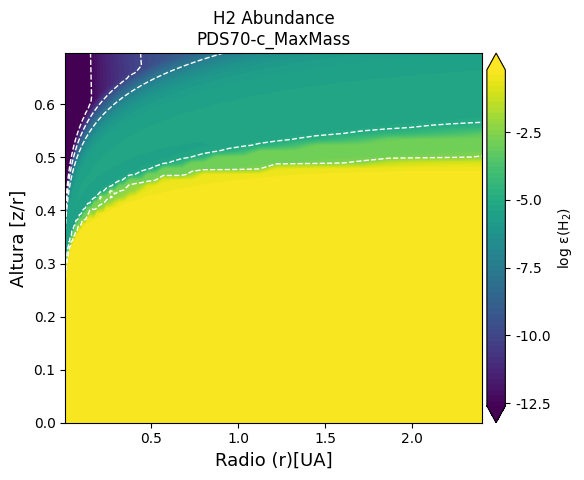

PLOT: plot_abuncont ...


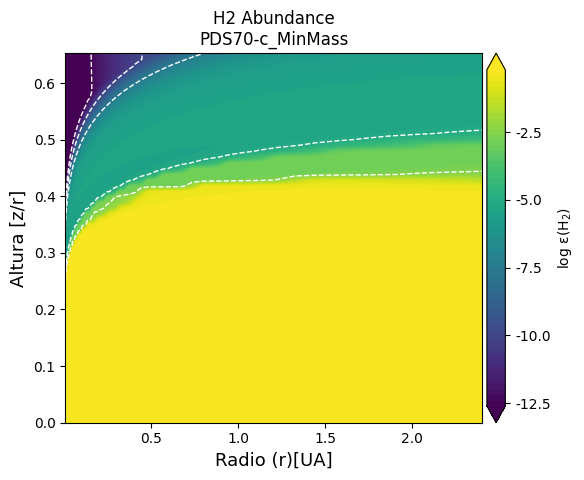

In [23]:
i = 0
for lab in labels:
    species_name = 'H2'
    pp = pplot.Plot(None)
    
    # Uso de f-string para incorporar el nombre de la especie en el título
    pp.plot_abuncont(models[i], species=species_name, rel2H=True, zlog=True, zr=True, title=f'{species_name} Abundance\n{lab}', xlog=False)
    
    # Mostrar la gráfica
    
    plt.xlabel(rlabel,fontsize=label_fontsize) 
    plt.ylabel(rylabel,fontsize=label_fontsize)
    #plt.savefig("Abu__%s.pdf"%lab)
    plt.show()
    i += 1

PLOT: plot_cont ...


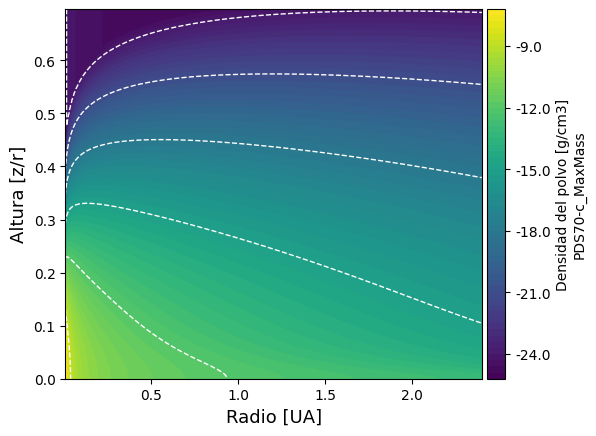

PLOT: plot_cont ...


/home/usuario/Documentos/Prodimo/prodimopy-master/prodimopy/plot.py:522: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in CS.collections:


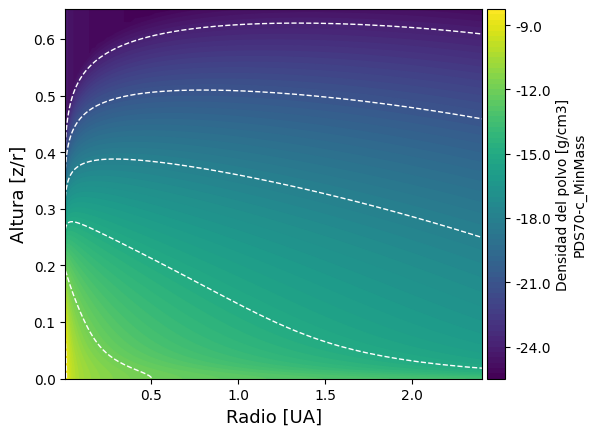

In [31]:
i=0
for lab in labels:
    pp=pplot.Plot(None)
    pp.plot_cont(models[i], models[i].rhod,'Densidad del polvo [g/cm3]\n%s'%labels[i], xlog=False)
    plt.xlabel(rlabel,fontsize=label_fontsize) 
    plt.ylabel(rylabel,fontsize=label_fontsize) 
    plt.savefig("Dust_density_%s.pdf"%lab)
    plt.show()
    i=i+1 

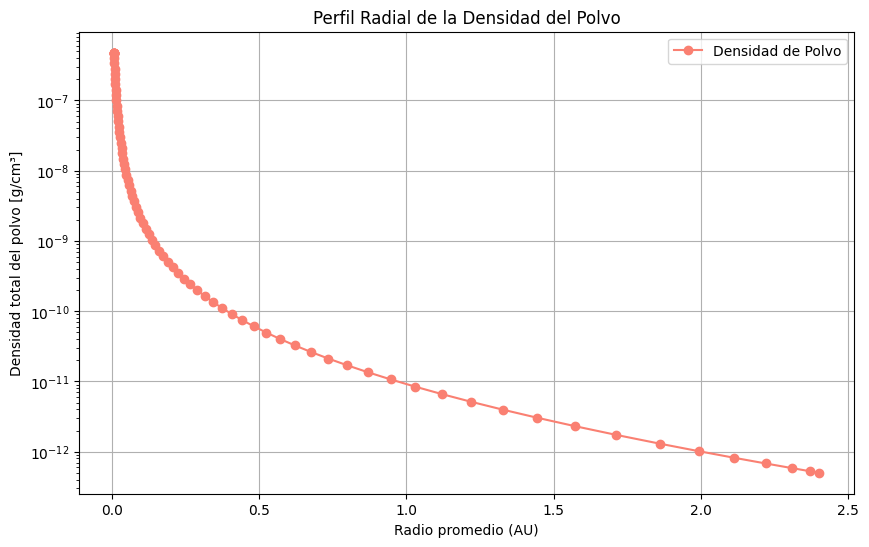

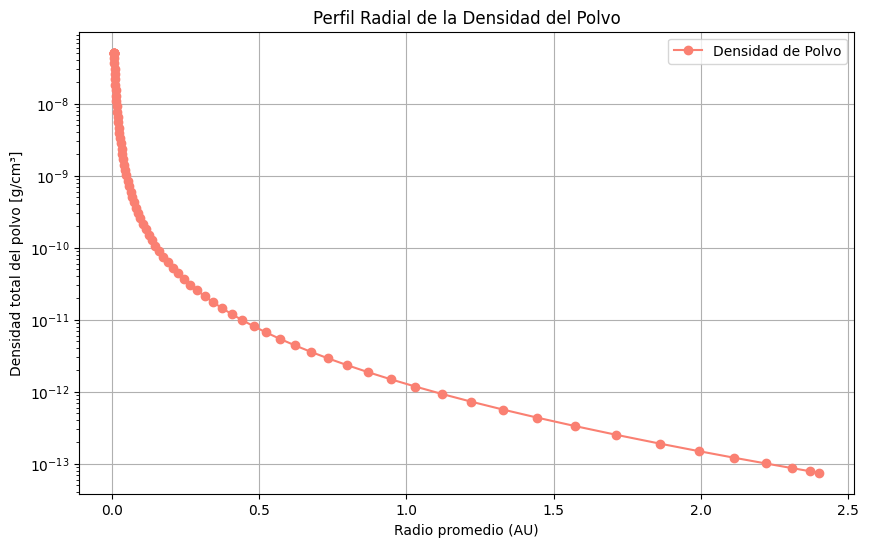

In [11]:
# Iterar sobre los modelos
i = 0
for lab in labels:
    # Extraer la densidad del polvo
    dust_density = models[i].rhod  # Densidad del polvo en g/cm³

    # Verificar que la forma de `dust_density` coincide con `x`
    if dust_density.shape == models[i].x.shape:
        # Calcular la suma o promedio de la densidad sobre la altura (dimensión vertical)
        density_sum = dust_density.sum(axis=1)  # Suma sobre z
        x_mean = models[i].x.mean(axis=1)  # Promedio de valores radiales

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.yscale('log')
        plt.plot(x_mean, density_sum, marker='o', linestyle='-', color='salmon', label="Densidad de Polvo")
        plt.xlabel("Radio promedio (AU)")
        plt.ylabel("Densidad total del polvo [g/cm³]")
        plt.title("Perfil Radial de la Densidad del Polvo")
        plt.grid()
        plt.legend()
        plt.savefig(f"Dust_density_{lab}.pdf", dpi=300)
        plt.show()
    else:
        print(f"⚠️ Dimensiones no coinciden en {lab}: x.shape={models[i].x.shape}, rhod.shape={dust_density.shape}")

    i += 1

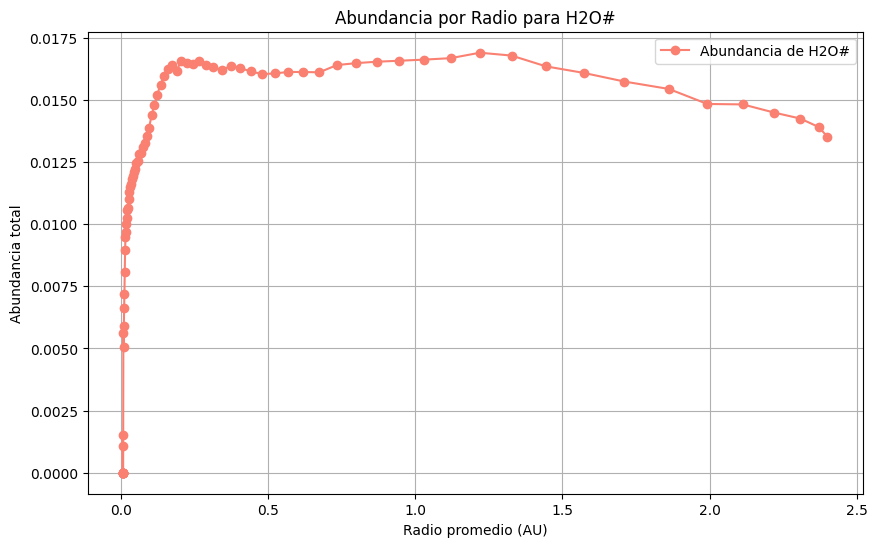

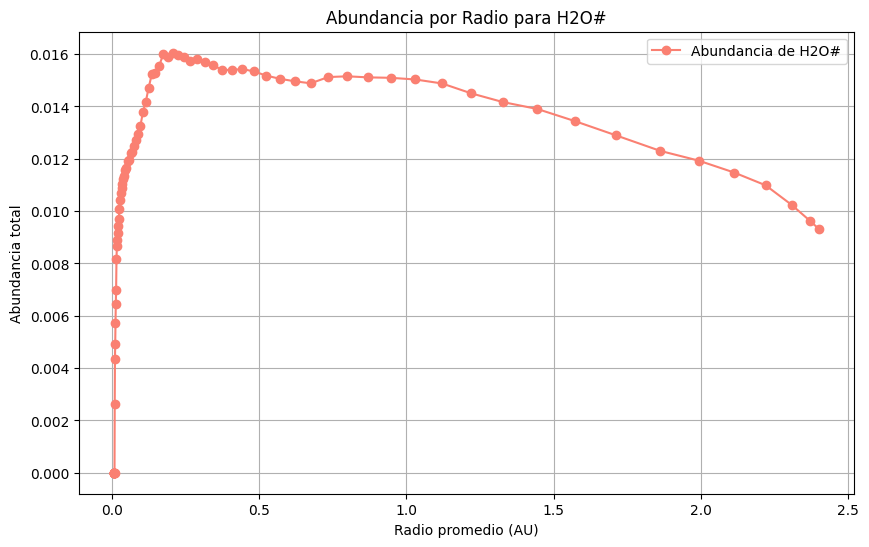

In [13]:
species_name = "H2O#"

i = 0
for lab in labels:
    abundance_data = models[i].getAbun(species_name)

    if abundance_data.shape == models[i].x.shape:
    # Calcular la suma de abundancia a lo largo de una dimensión
        abundance_sum = abundance_data.sum(axis=1)  # Suma a lo largo de columnas (z)

    # Calcular un promedio para x si es necesario
        x_mean = models[i].x.mean(axis=1)  # Promedio de valores radiales

        plt.figure(figsize=(10, 6))
        plt.plot(x_mean, abundance_sum, marker='o', linestyle='-', label=f"Abundancia de {species_name}", color ='salmon')
        plt.xlabel("Radio promedio (AU)")
        plt.ylabel("Abundancia total")
        plt.title(f"Abundancia por Radio para {species_name}")
        plt.grid()
        plt.legend()
    #plt.savefig("abundancia_vs_radio.pdf", dpi=300)
        plt.show()
    else:
        print("Dimensiones de x, z y la abundancia no coinciden. Verifica los datos.")
    i += 1

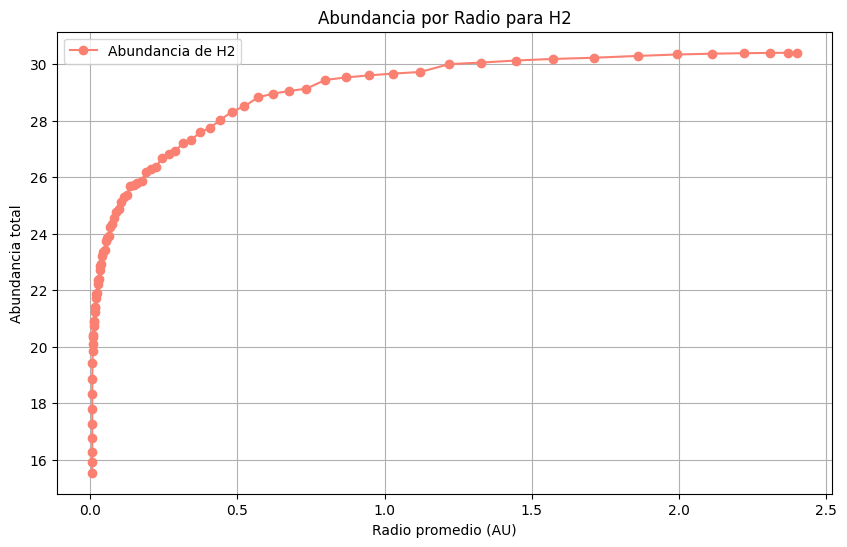

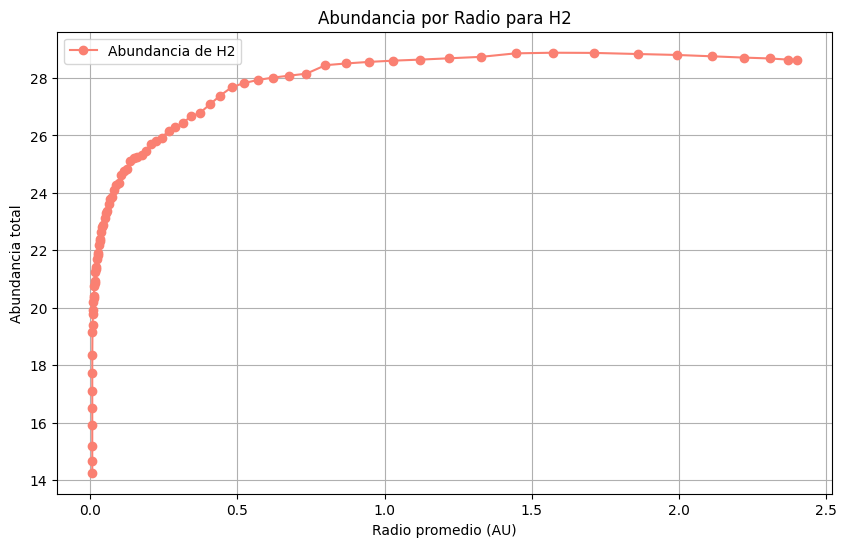

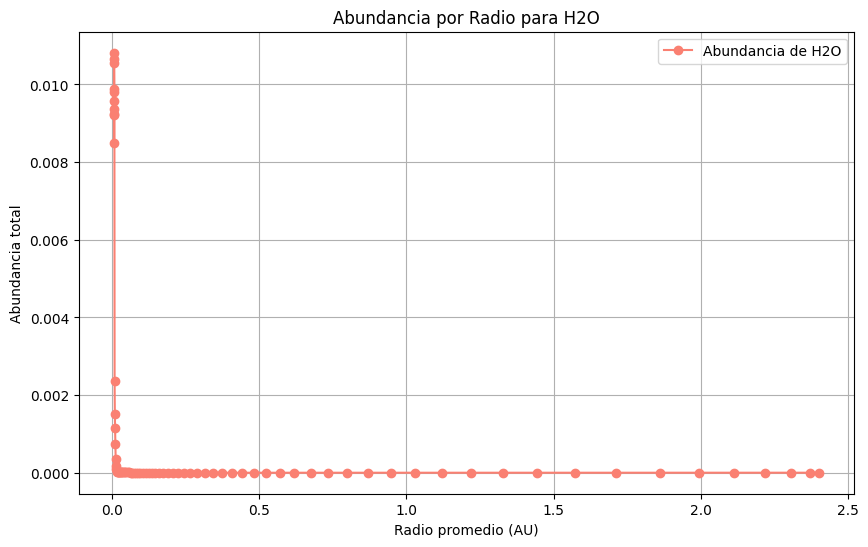

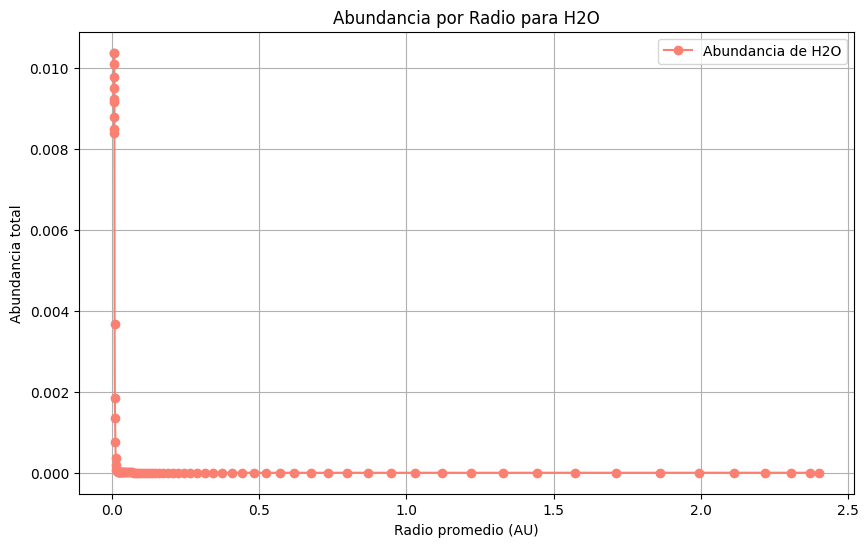

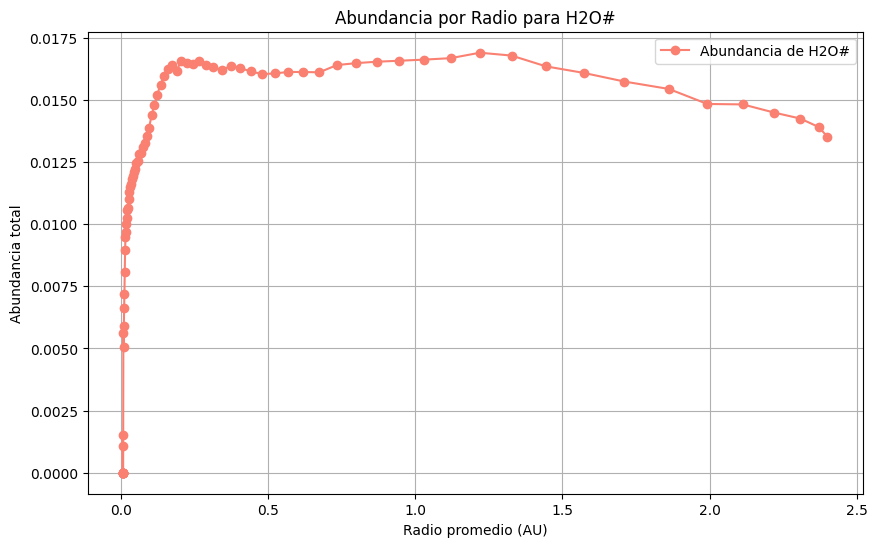

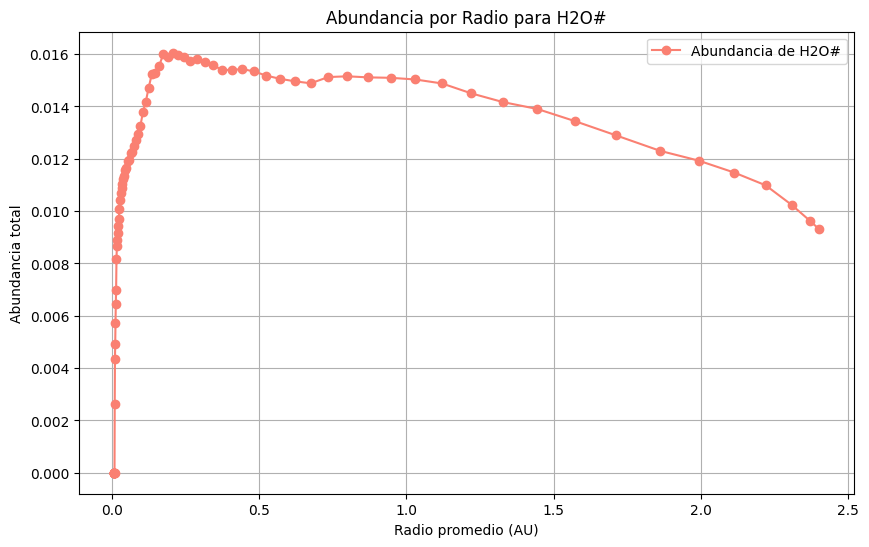

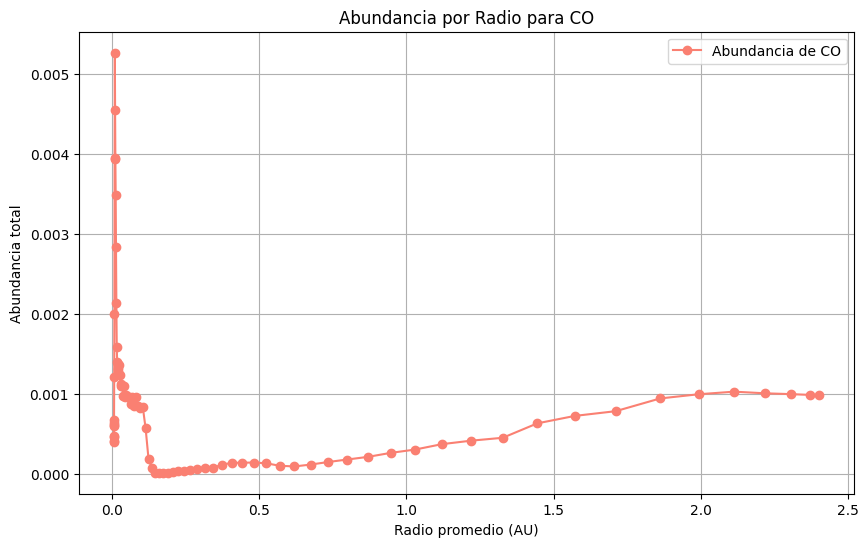

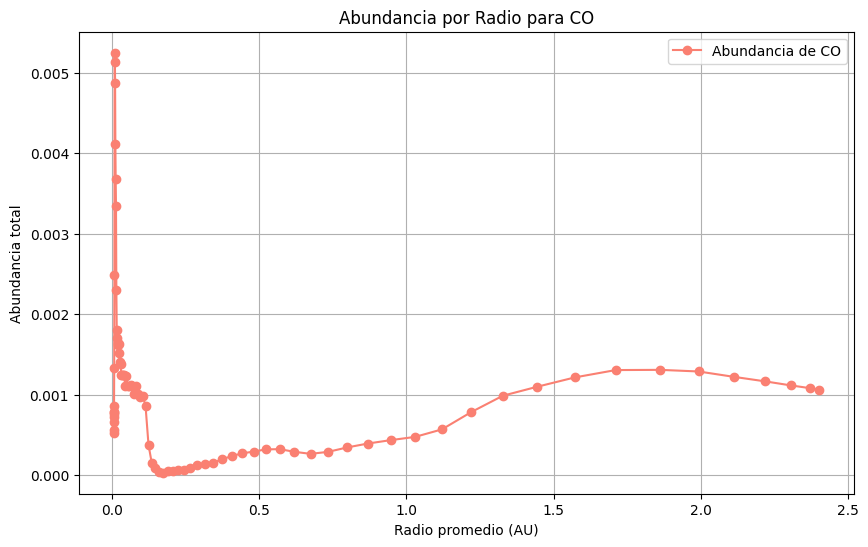

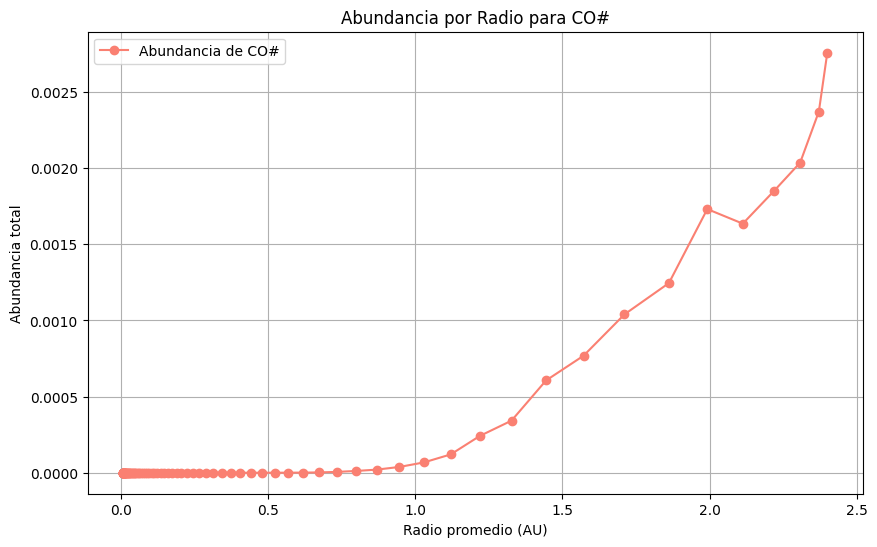

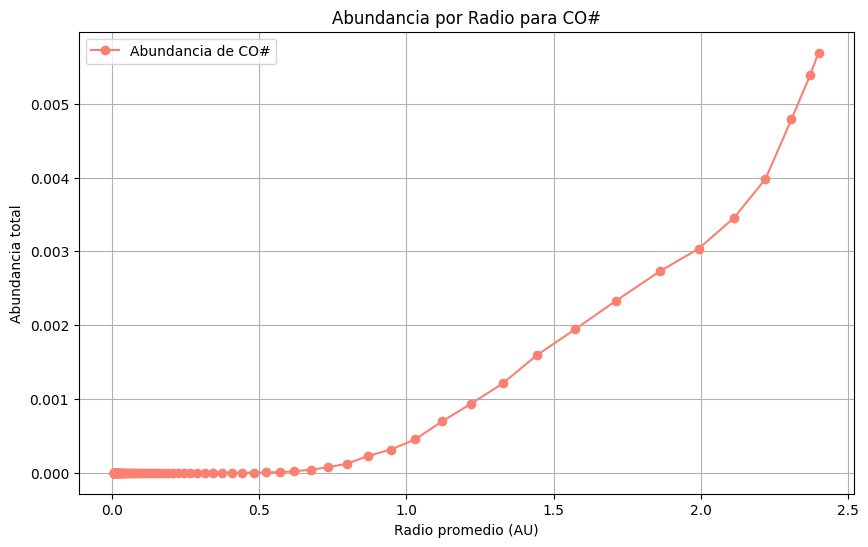

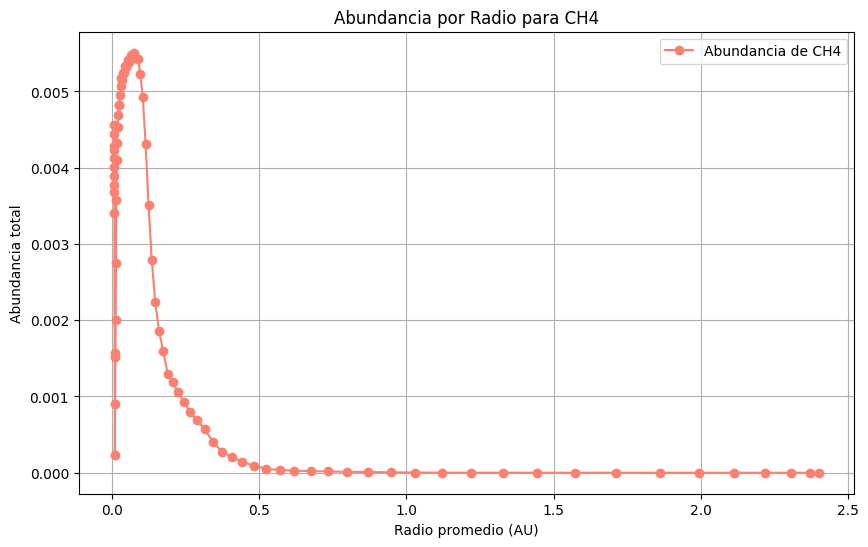

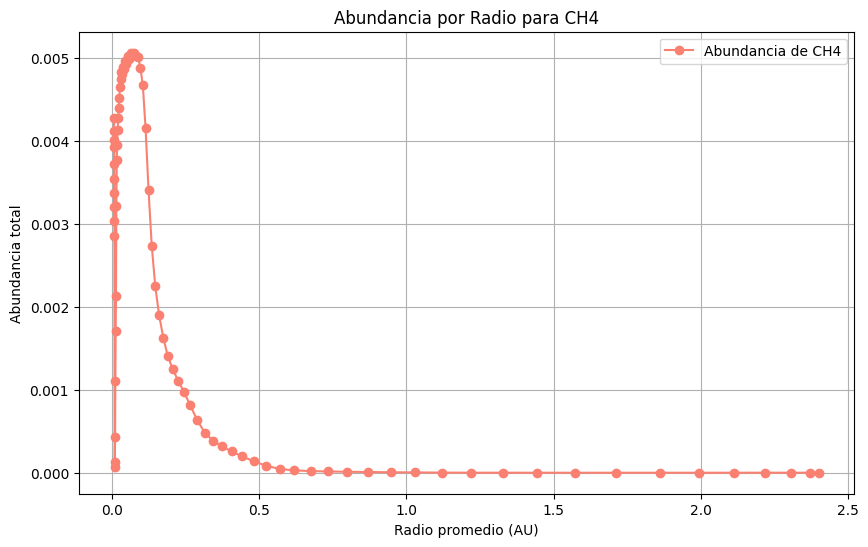

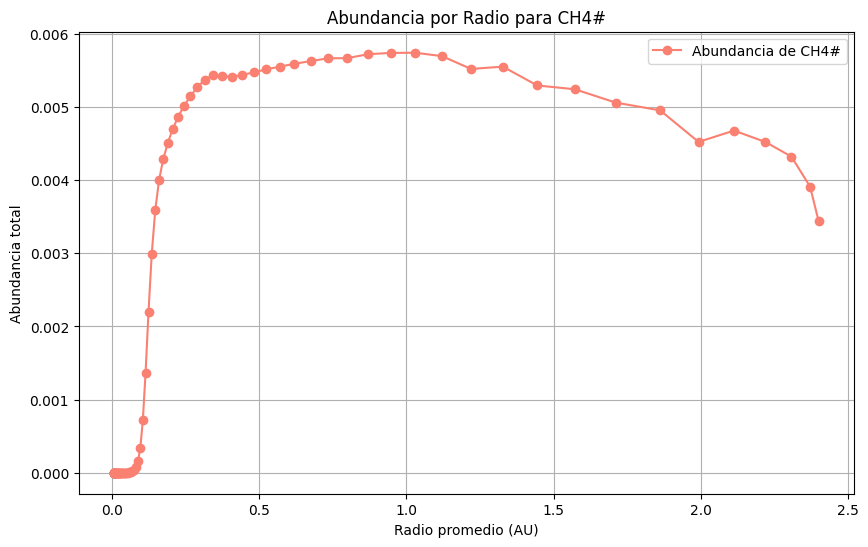

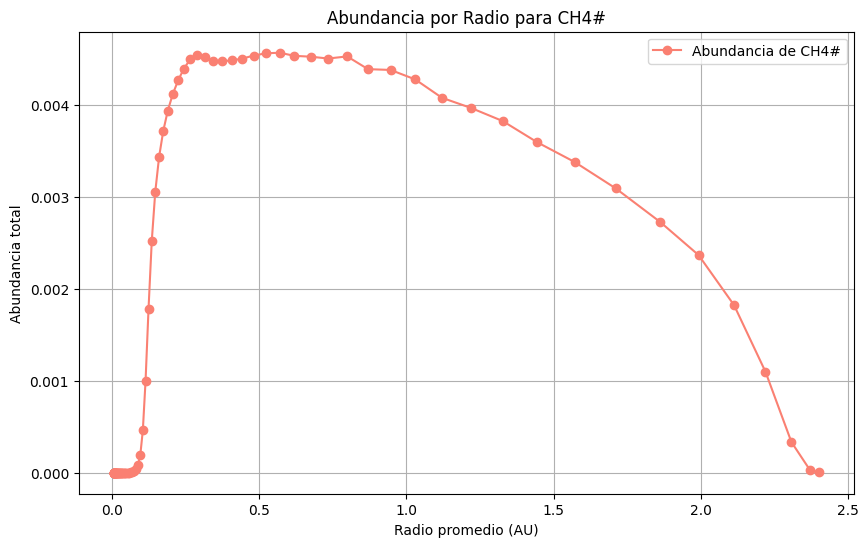

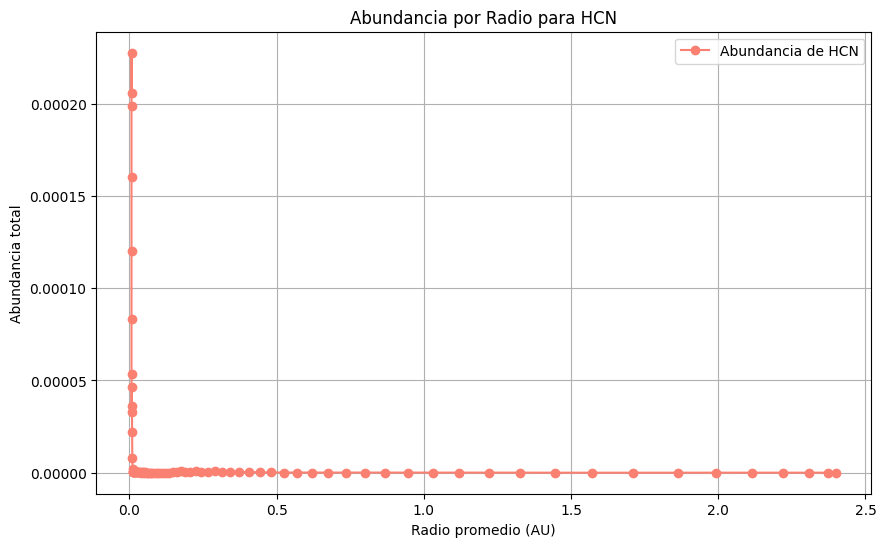

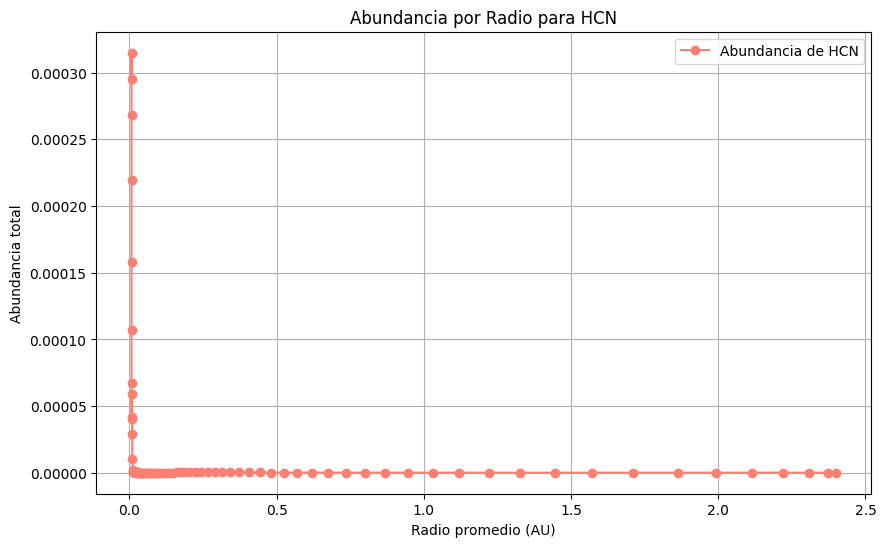

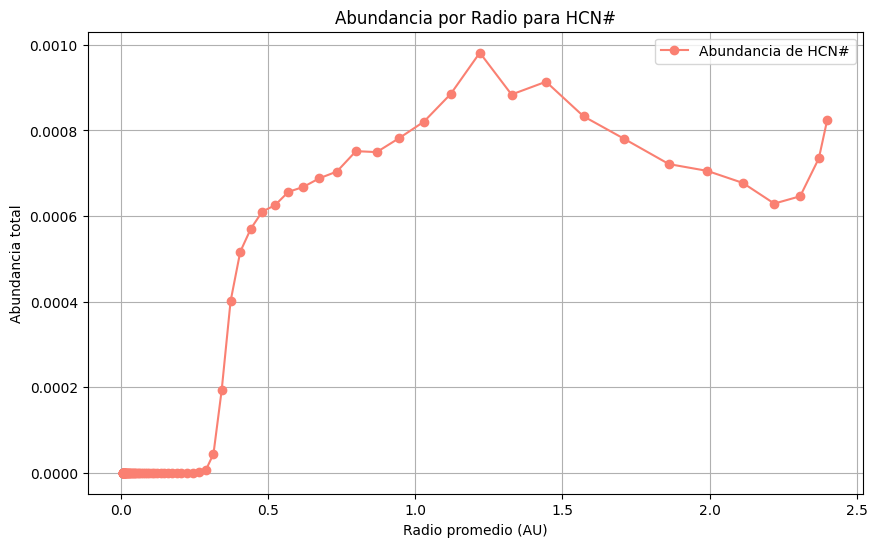

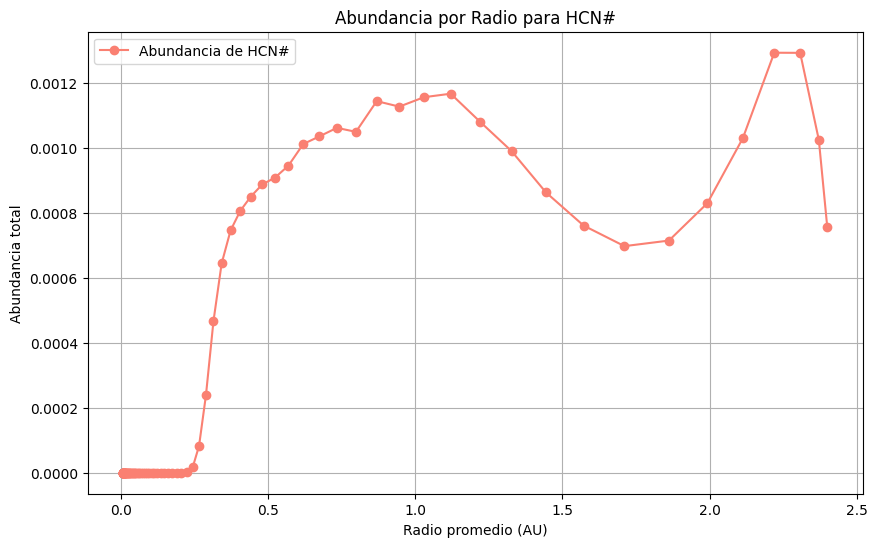

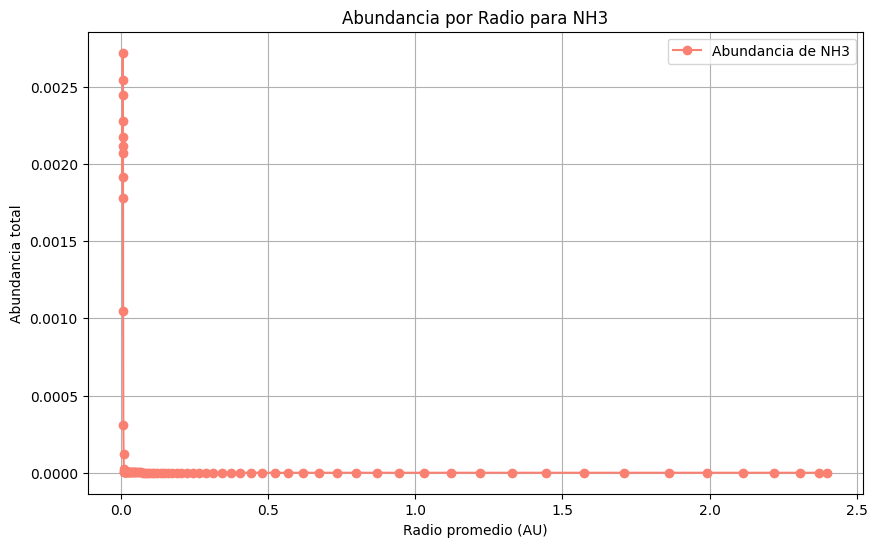

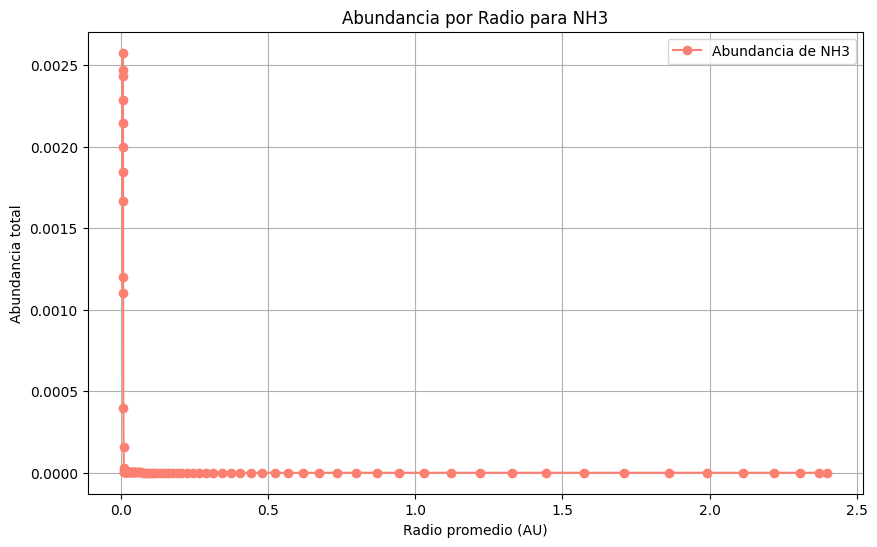

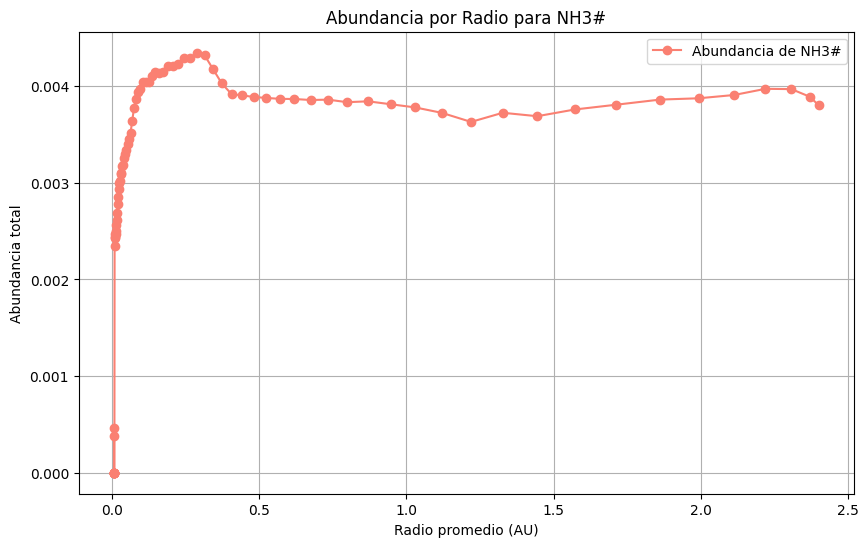

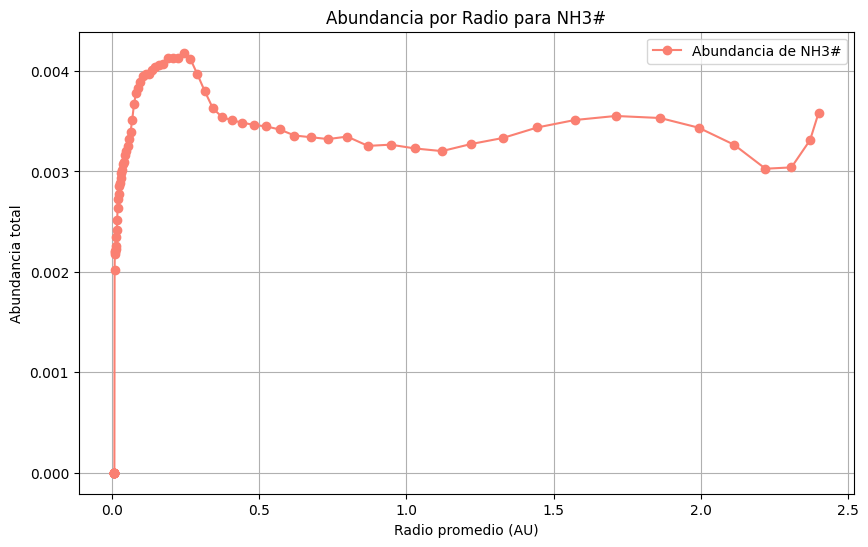

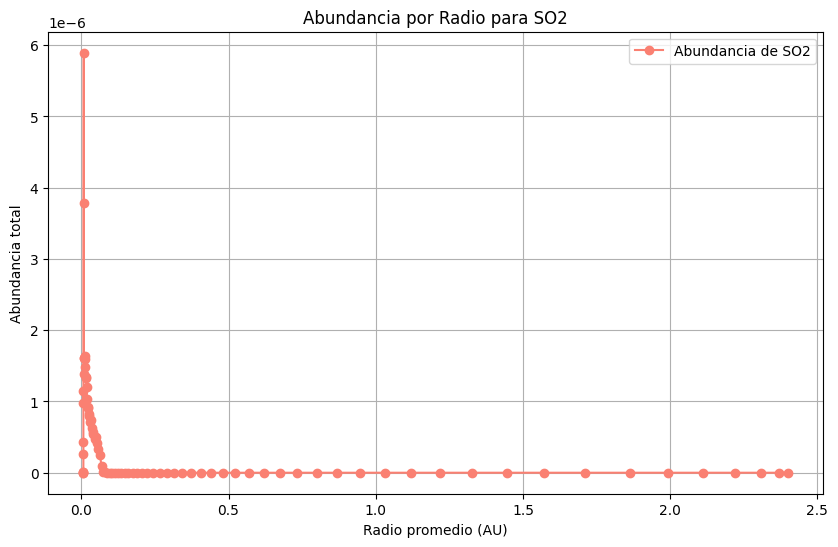

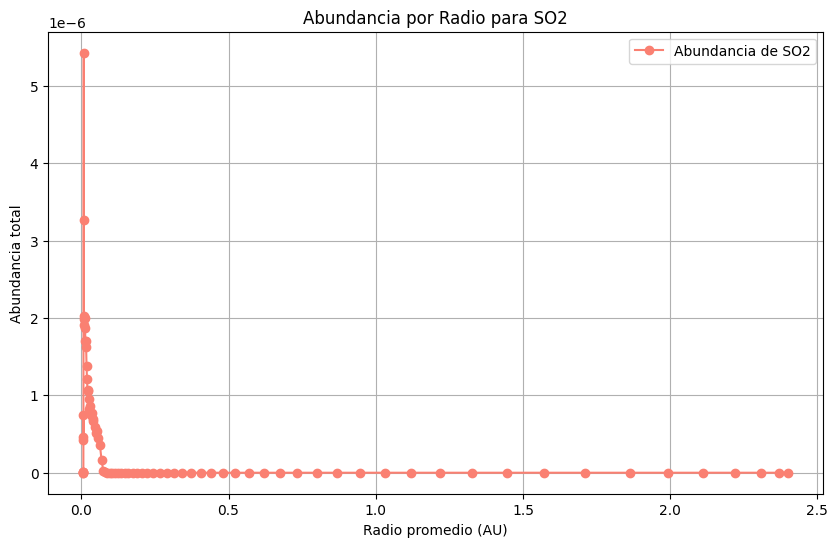

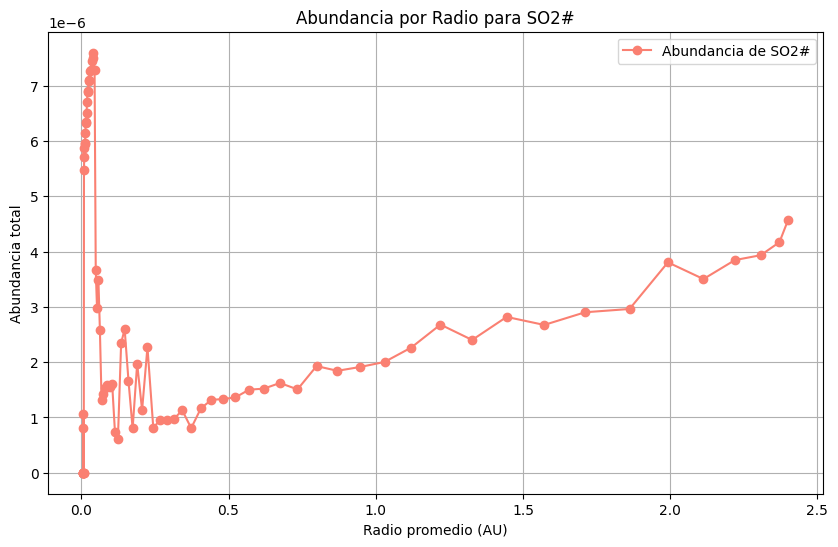

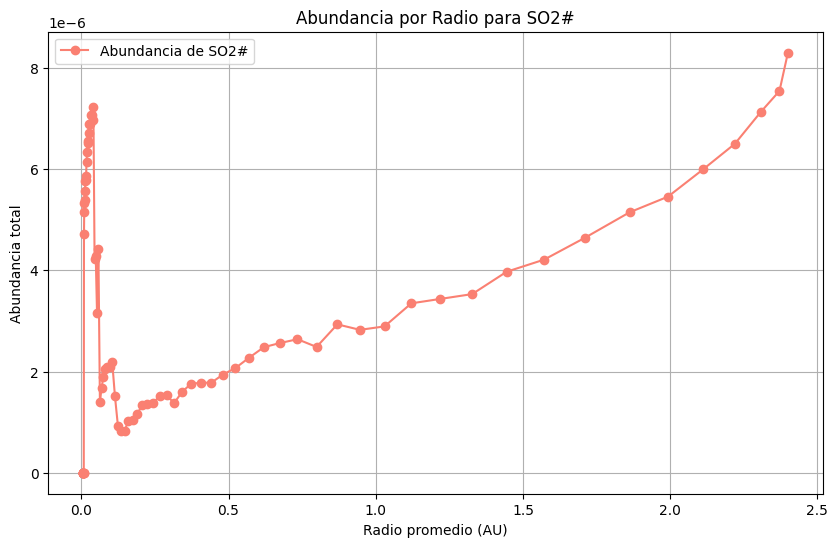

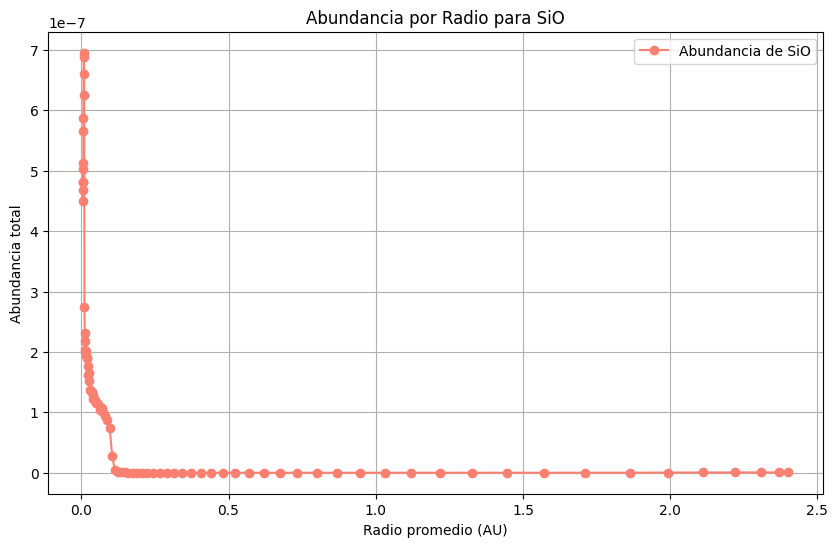

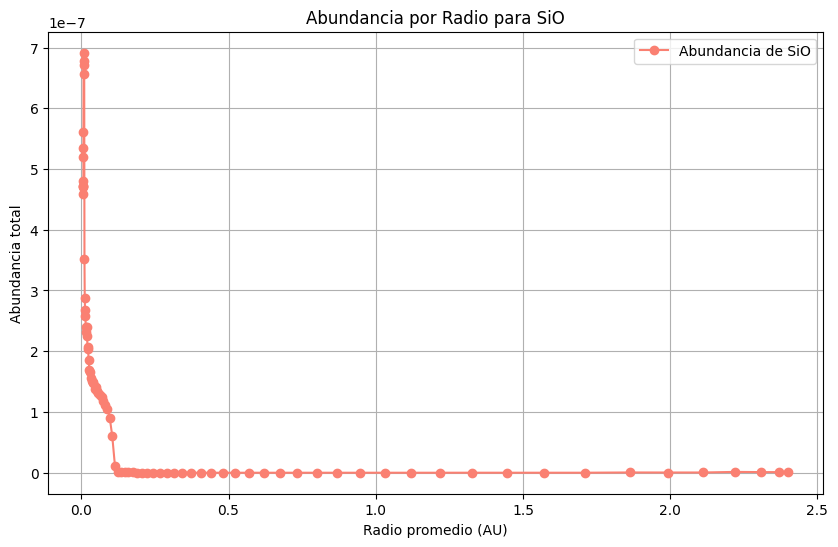

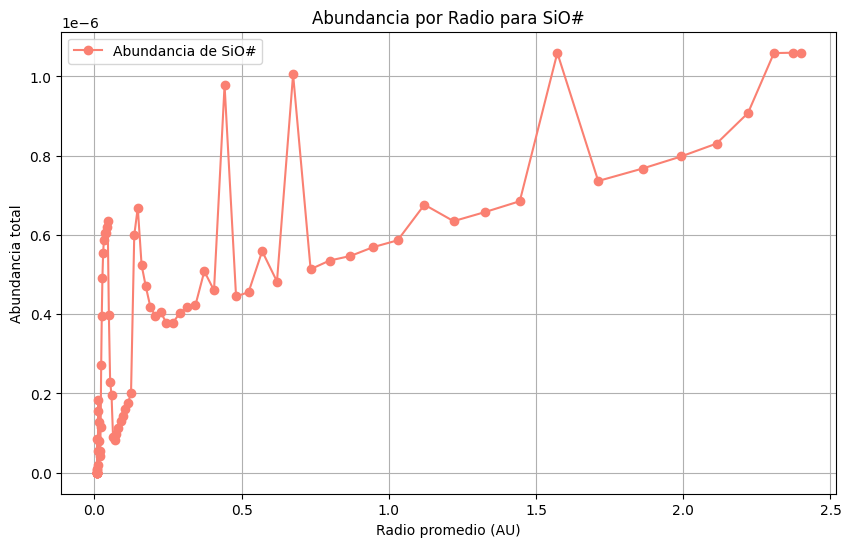

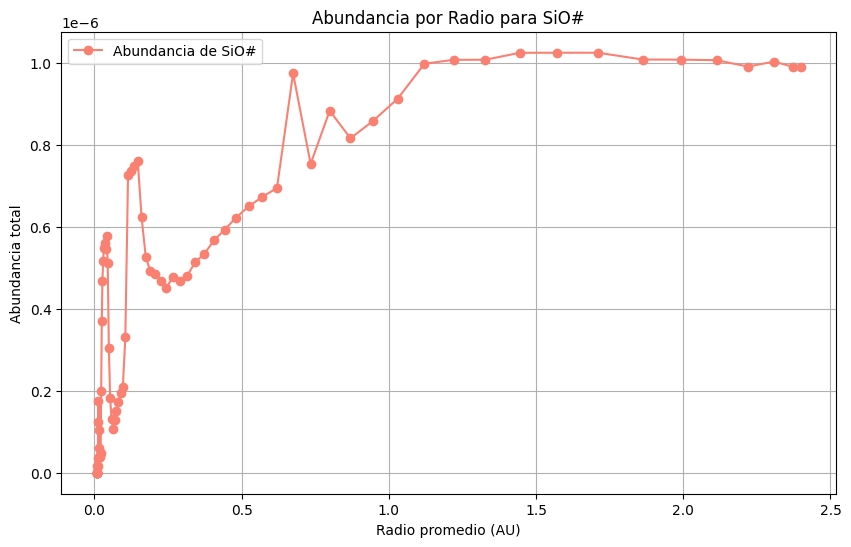

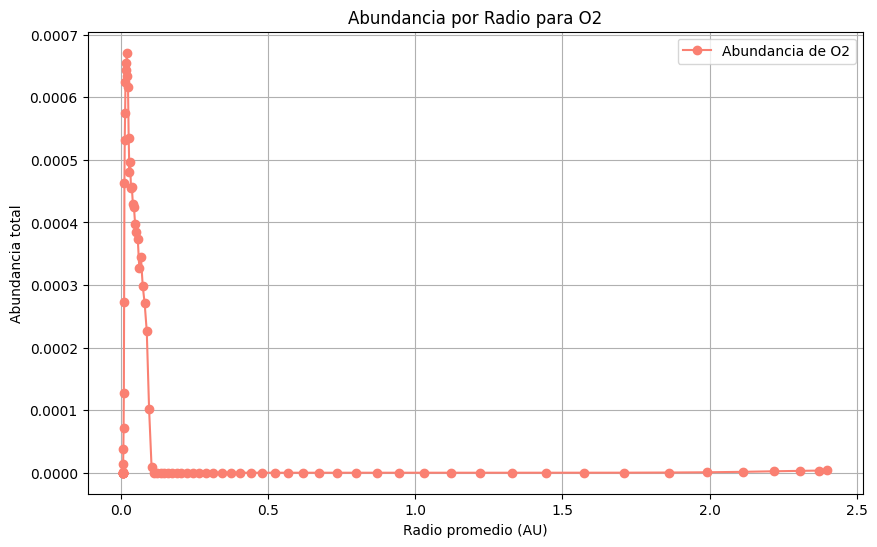

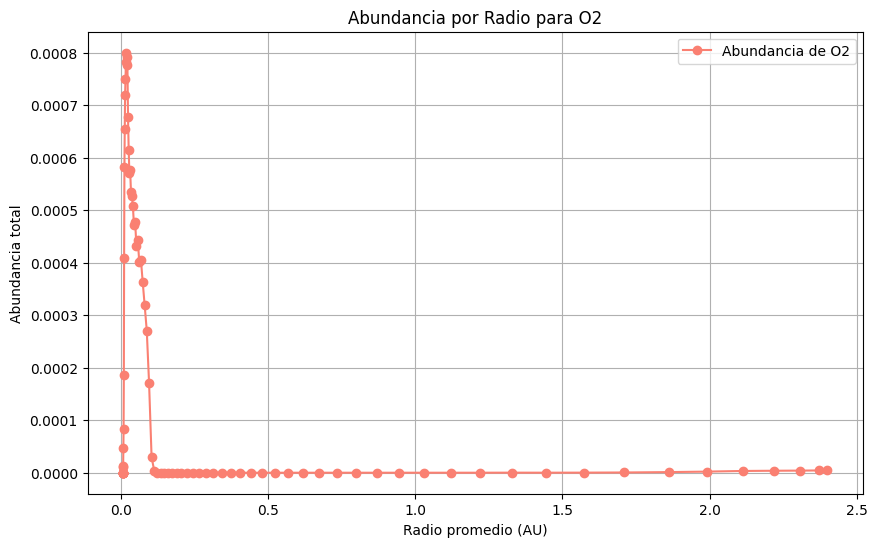

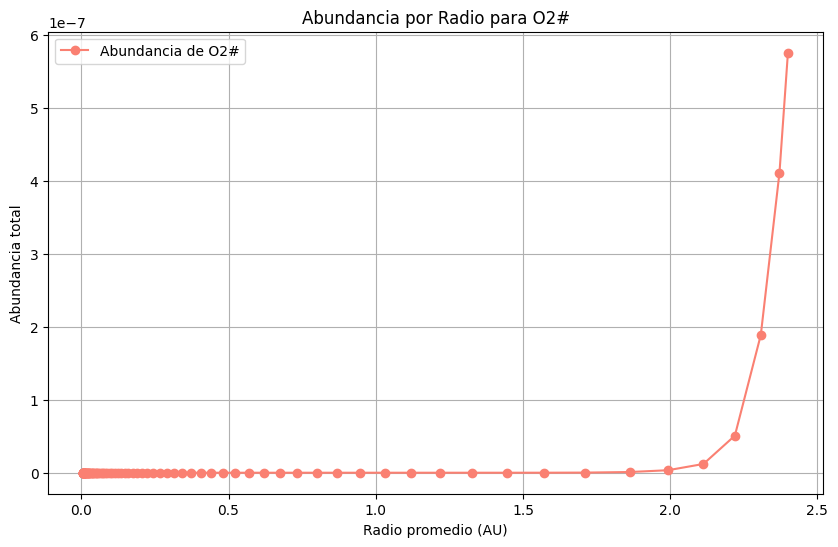

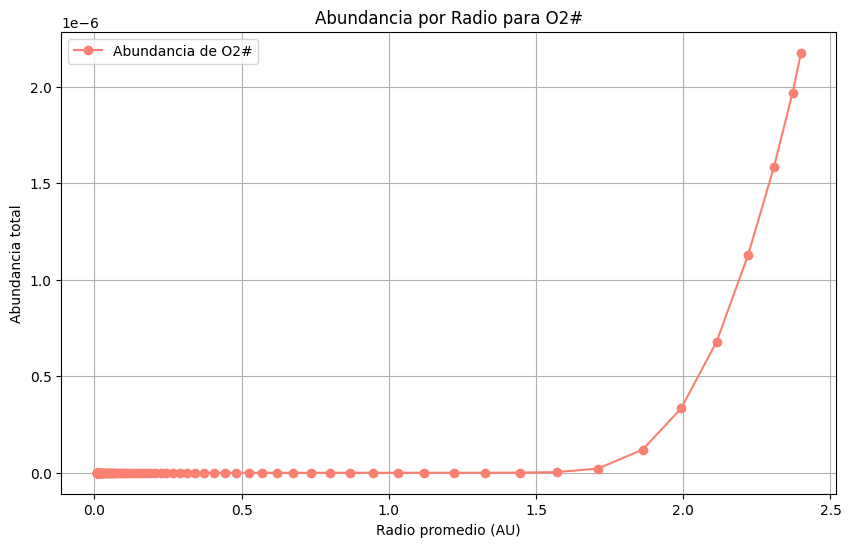

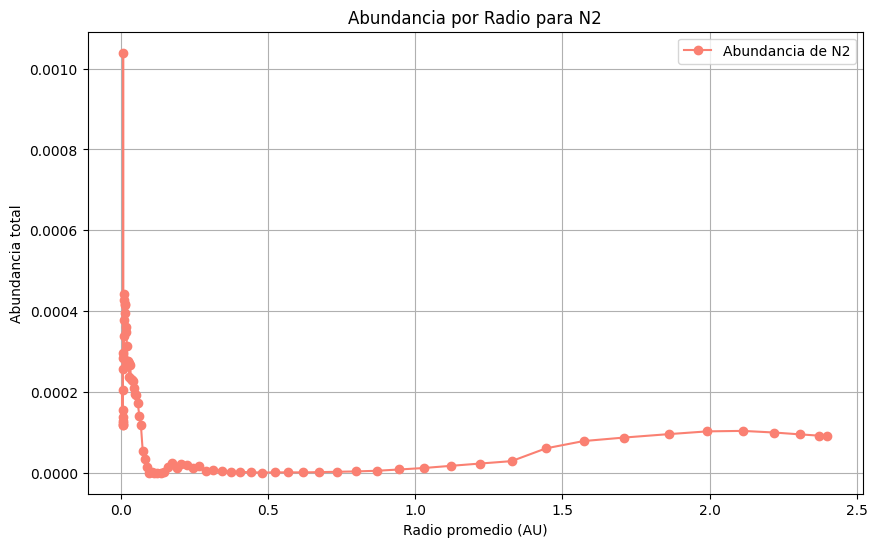

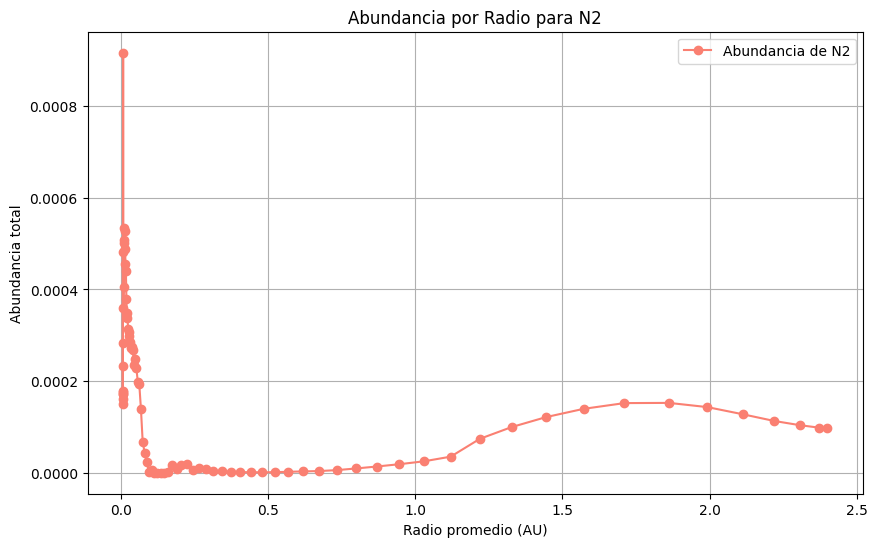

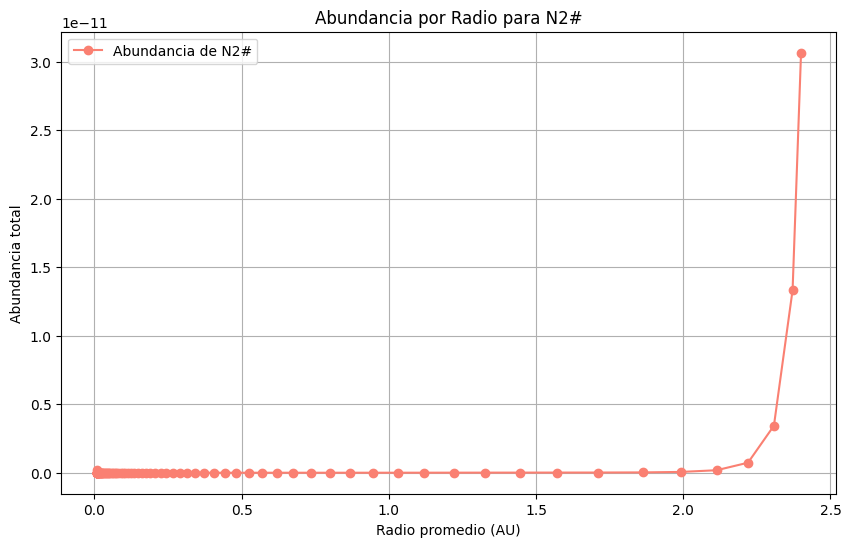

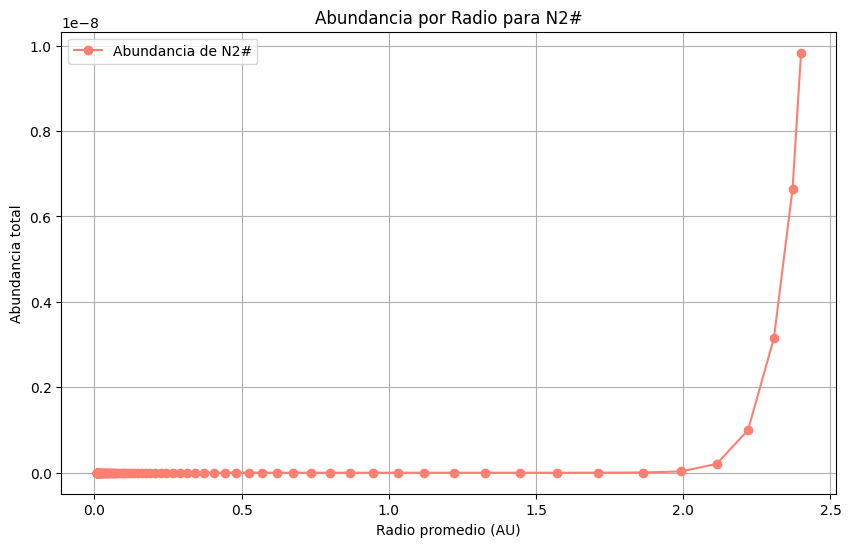

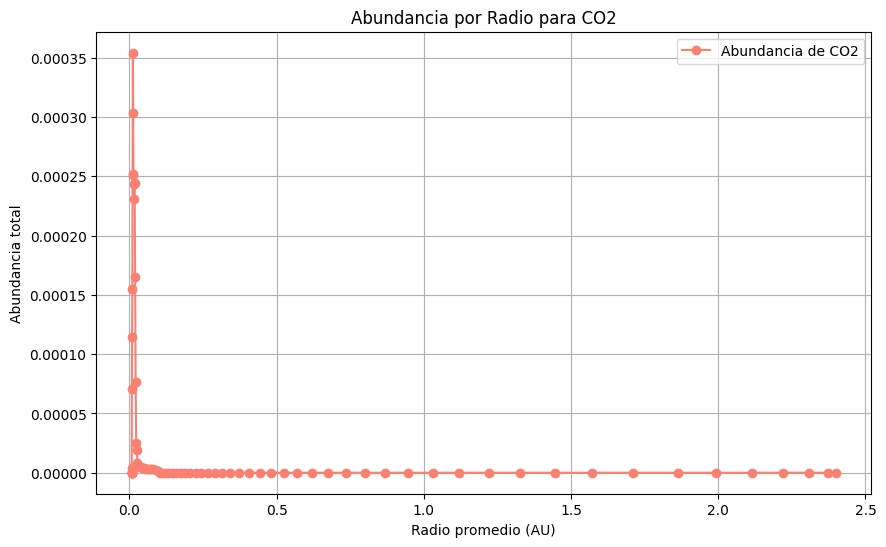

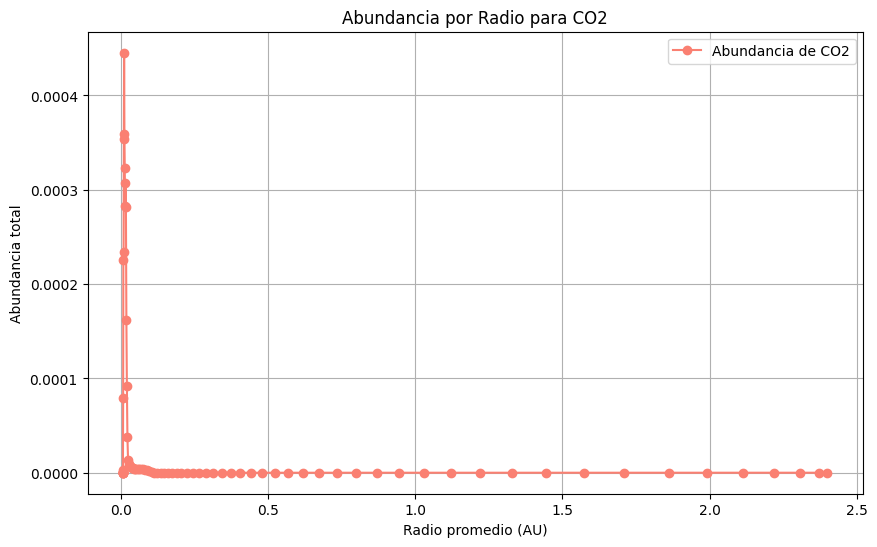

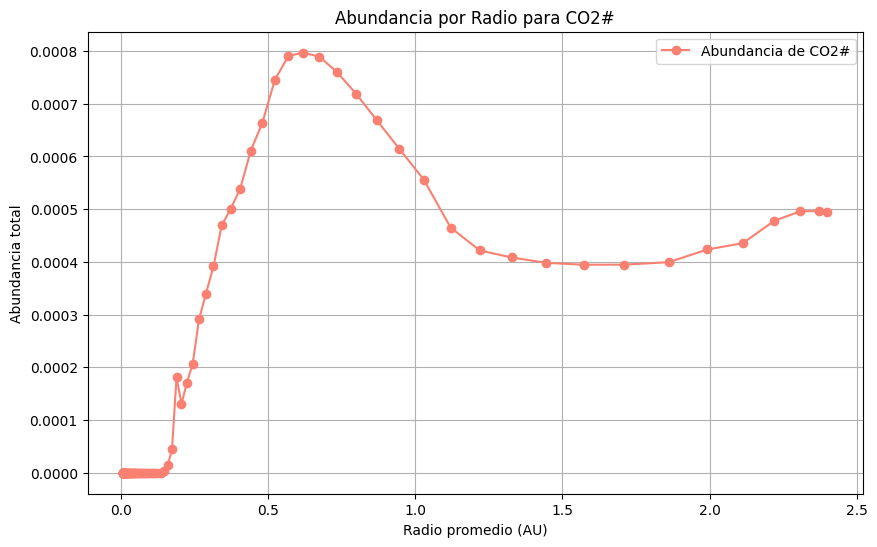

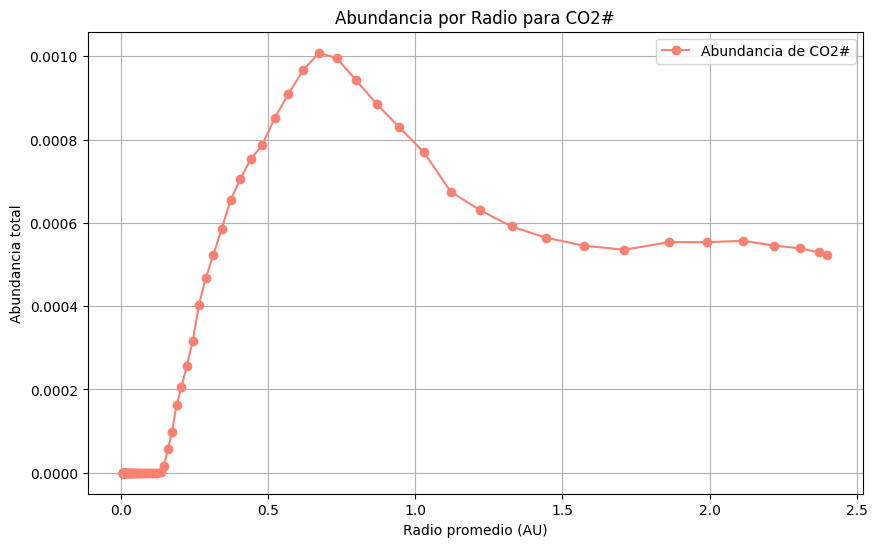

In [43]:
#Para todas las especies químicas que quiero
species_list = [
    "H2", "H2O", "H2O#", "CO", "CO#", "CH4", "CH4#", "HCN", "HCN#", "NH3", "NH3#",
    "SO2", "SO2#", "SiO", "SiO#", "O2", "O2#", "N2", "N2#", "CO2", "CO2#"
]

for species_name in species_list:
    i = 0
    for lab in labels:
        abundance_data = models[i].getAbun(species_name)

        if abundance_data.shape == models[i].x.shape:
            # Calcular la suma de abundancia a lo largo de una dimensión
            abundance_sum = abundance_data.sum(axis=1)  # Suma a lo largo de columnas (z)

            # Calcular un promedio para x si es necesario
            x_mean = models[i].x.mean(axis=1)  # Promedio de valores radiales

            plt.figure(figsize=(10, 6))
            plt.plot(
                x_mean, abundance_sum, marker='o', linestyle='-',
                label=f"Abundancia de {species_name}", color='salmon'
            )
            plt.xlabel("Radio promedio (AU)")
            plt.ylabel("Abundancia total")
            plt.title(f"Abundancia por Radio para {species_name}")
            plt.grid()
            plt.legend()
            # Guardar gráfico (opcional, descomentar para habilitar)
            # plt.savefig(f"abundancia_vs_radio_{species_name}.pdf", dpi=300)
            plt.show()
        else:
            print(f"Dimensiones de x, z y la abundancia no coinciden para {species_name}. Verifica los datos.")
        i += 1

Graficando densidad superficial para CO# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para H en el modelo [1]...
PLOT: plot_NH ...
Graficando densidad superficial para H2O# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para CH4# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para SiO# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para HCN# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para NH3# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para SO2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para O2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para N2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para CO2# en el modelo [1]...
PLOT: plot_cdnmol ...


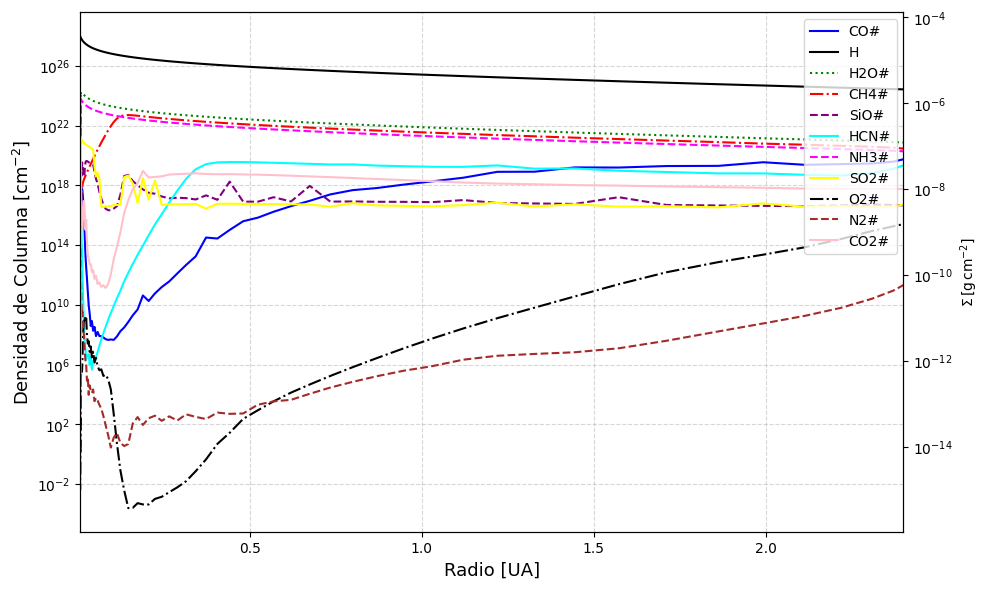

In [14]:
#Densidad superficial modelo de maxmass
# Especies químicas a analizar
species_list = [ "CO#", "H", "H2O#", "CH4#", "SiO#", "HCN#", "NH3#", "SO2#", "O2#", "N2#", "CO2#"]  # Agrega las especies químicas de interés

# Inicializar la clase Plot
pp = pplot.Plot(None)

# Crear una figura y un eje único para todas las especies
fig, ax = plt.subplots(figsize=(10, 6))

# Configuración de colores y estilos
colors = ["blue", "orange", "green", "red", "purple", "cyan", "magenta", "yellow", "black", "brown", "pink"]  # Colores personalizados
styles = ["-", "--", ":", "-.", "--", "-", "--", "-", "-.", "--", "-"]  # Estilos de línea personalizados

# Iterar sobre las especies químicas y graficarlas en el mismo eje
for idx, species in enumerate(species_list):
    print(f"Graficando densidad superficial para {species} en el modelo [1]...")
    
    if species == "H":
        # Graficar la densidad superficial para el Hidrógeno
        pp.plot_NH(
            models[0],
            ax=ax,  # Pasar el eje explícitamente
            ylabel=None,  # Eliminar etiquetas redundantes
            color=colors[idx],
            style=styles[idx],
            sdscale=True  # Escala de densidad superficial
        )
    else:
        # Graficar para las demás especies químicas
        pp.plot_cdnmol(
            models[0], 
            ax=ax,  # Pasar el eje explícitamente
            species=[species],  # Especificar la especie química
            ylabel=None,  # Eliminar etiquetas redundantes
            colors=[colors[idx]],  # Color específico
            styles=[styles[idx]],  # Estilo específico
            norm=None  # Normalización opcional
        )

# Configuración del gráfico
ax.set_xscale("linear")  # Escala lineal para el eje x
ax.set_yscale("log")  # Escala logarítmica para el eje y
ax.autoscale(enable=True, axis="y")  # Habilitar la autoscalado en el eje y
#ax.set_title("Densidad superficial para el modelo [0]", fontsize=14)  # Título del gráfico
ax.set_xlabel("Radio [UA]", fontsize=13)  # Etiqueta del eje x
ax.set_ylabel(r"Densidad de Columna $\mathrm{[cm^{-2}]}$", fontsize=13)  # Etiqueta del eje y
ax.legend(species_list, loc="upper right", fontsize=10)  # Leyenda con todas las especies
ax.grid(True, linestyle="--", alpha=0.5)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.savefig("Densidad superficial_hielos_MaxMass_%s.pdf")
plt.show()

Graficando densidad superficial para CO# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para H en el modelo [1]...
PLOT: plot_NH ...
Graficando densidad superficial para H2O# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para CH4# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para SiO# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para HCN# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para NH3# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para SO2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para O2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para N2# en el modelo [1]...
PLOT: plot_cdnmol ...
Graficando densidad superficial para CO2# en el modelo [1]...
PLOT: plot_cdnmol ...


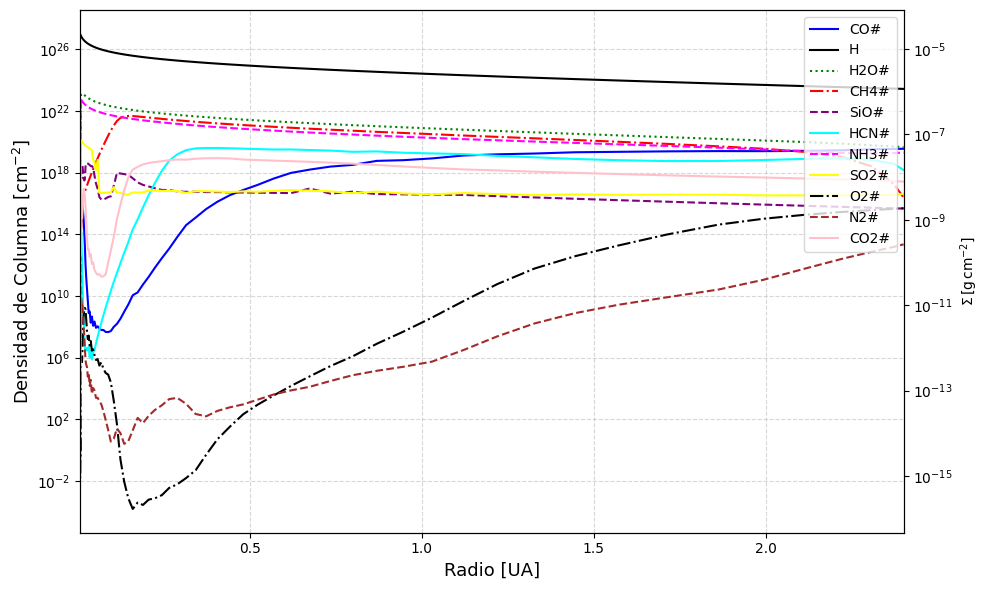

In [15]:
#Densidad superficial modelo de minmass
# Especies químicas a analizar
species_list = [ "CO#", "H", "H2O#", "CH4#", "SiO#", "HCN#", "NH3#", "SO2#", "O2#", "N2#", "CO2#"]  # Agrega las especies químicas de interés

# Inicializar la clase Plot
pp = pplot.Plot(None)

# Crear una figura y un eje único para todas las especies
fig, ax = plt.subplots(figsize=(10, 6))

# Configuración de colores y estilos
colors = ["blue", "orange", "green", "red", "purple", "cyan", "magenta", "yellow", "black", "brown", "pink"]  # Colores personalizados
styles = ["-", "--", ":", "-.", "--", "-", "--", "-", "-.", "--", "-"]  # Estilos de línea personalizados

# Iterar sobre las especies químicas y graficarlas en el mismo eje
for idx, species in enumerate(species_list):
    print(f"Graficando densidad superficial para {species} en el modelo [1]...")
    
    if species == "H":
        # Graficar la densidad superficial para el Hidrógeno
        pp.plot_NH(
            models[1],
            ax=ax,  # Pasar el eje explícitamente
            ylabel=None,  # Eliminar etiquetas redundantes
            color=colors[idx],
            style=styles[idx],
            sdscale=True  # Escala de densidad superficial
        )
    else:
        # Graficar para las demás especies químicas
        pp.plot_cdnmol(
            models[1], 
            ax=ax,  # Pasar el eje explícitamente
            species=[species],  # Especificar la especie química
            ylabel=None,  # Eliminar etiquetas redundantes
            colors=[colors[idx]],  # Color específico
            styles=[styles[idx]],  # Estilo específico
            norm=None  # Normalización opcional
        )

# Configuración del gráfico
ax.set_xscale("linear")  # Escala lineal para el eje x
ax.set_yscale("log")  # Escala logarítmica para el eje y
ax.autoscale(enable=True, axis="y")  # Habilitar la autoscalado en el eje y
#ax.set_title("Densidad superficial para el modelo [0]", fontsize=14)  # Título del gráfico
ax.set_xlabel("Radio [UA]", fontsize=13)  # Etiqueta del eje x
ax.set_ylabel(r"Densidad de Columna $\mathrm{[cm^{-2}]}$", fontsize=13)  # Etiqueta del eje y
ax.legend(species_list, loc="upper right", fontsize=10)  # Leyenda con todas las especies
ax.grid(True, linestyle="--", alpha=0.5)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.savefig("Densidad superficial_hielos_MinMass_%s.pdf")
plt.show()

In [24]:
# Cargar el archivo con los rangos de radios
radii_ranges = pd.read_csv("dist_r_m_fin_26.txt", sep=" ", header=None, names=["radio_max", "radio_min"])

# Lista de especies químicas
species_list = ['H2', 'H2O', 'H2O#', 'CO', 'CO#', 'CH4', 'CH4#', 'HCN', 'HCN#', 'NH3', 'NH3#',
                'SO2', 'SO2#', 'SiO', 'SiO#', 'O2', 'O2#', 'N2', 'N2#', 'CO2', 'CO2#']

# Resultados de las abundancias promedio
results = []

# Iterar sobre cada rango de radio
for index, row in radii_ranges.iterrows():
    radio_min = row['radio_min']
    radio_max = row['radio_max']
    range_value = f"Rango_{index + 1}: {radio_min:.2e} - {radio_max:.2e}"  # Formato para identificar cada rango

    for species_name in species_list:
        species_data = {"Especie": species_name}
        for i, model in enumerate(models):  # Iterar sobre los modelos cargados
            try:
                # Obtener datos de abundancia y radios
                abundance_data = model.getAbun(species_name)
                x = model.x  # Radios

                # Calcular el promedio de radios
                if len(x.shape) > 1:  # Si x es bidimensional
                    r_values = x.mean(axis=1)
                else:
                    r_values = x

                # Filtrar datos dentro del rango
                mask = (r_values >= radio_min) & (r_values <= radio_max)
                filtered_abundance = abundance_data[mask, :]  # Filtrar por radios

                # Calcular el promedio de abundancia dentro del rango
                if filtered_abundance.size > 0:
                    avg_abundance = filtered_abundance.mean()
                else:
                    avg_abundance = float('nan')  # Si no hay datos en el rango

                species_data[f"Modelo_{i + 1}"] = avg_abundance

            except Exception as e:
                print(f"Error al procesar la especie '{species_name}' en el modelo {i + 1}: {e}")
                species_data[f"Modelo_{i + 1}"] = None

        # Agregar el rango utilizado como columna
        species_data["Rango"] = range_value
        results.append(species_data)

# Crear tabla de resultados
results_df = pd.DataFrame(results)

# Reordenar columnas para claridad
column_order = ["Especie"] + [col for col in results_df.columns if col.startswith("Modelo_")] + ["Rango"]
results_df = results_df[column_order]

# Mostrar los primeros resultados
print(results_df.head())

# Guardar los resultados en un archivo CSV
results_df.to_csv("abundancias_promedio_multiples_rangos.csv", index=False)
print("Resultados guardados en 'abundancias_promedio_multiples_rangos.csv'.")

  Especie      Modelo_1      Modelo_2                         Rango
0      H2  2.228930e-01  2.136828e-01  Rango_1: 7.30e-04 - 9.42e-03
1     H2O  1.135917e-04  1.113258e-04  Rango_1: 7.30e-04 - 9.42e-03
2    H2O#  9.344581e-06  2.995937e-06  Rango_1: 7.30e-04 - 9.42e-03
3      CO  1.300418e-05  1.658828e-05  Rango_1: 7.30e-04 - 9.42e-03
4     CO#  1.991679e-13  4.385141e-14  Rango_1: 7.30e-04 - 9.42e-03
Resultados guardados en 'abundancias_promedio_multiples_rangos.csv'.


In [25]:
# Definir colores para especies similares
color_map = {
    "H2": "blue", "H2O": "cyan", "H2O#": "lightblue",
    "CO": "green", "CO#": "lightgreen", "CH4": "red", "CH4#": "pink",
    "HCN": "orange", "HCN#": "gold", "NH3": "purple", "NH3#": "violet",
    "SO2": "brown", "SO2#": "sandybrown", "SiO": "grey", "SiO#": "darkgrey",
    "O2": "teal", "O2#": "lightseagreen", "N2": "olive", "N2#": "yellowgreen",
    "CO2": "magenta", "CO2#": "hotpink"}

In [26]:
# Datos de abundancias promedio por especie química
species = [
    "H2", "H2O", "H2O#", "CO#", "CH4#", "HCN#", "NH3#","SO2#", "SiO#","O2#", "N2#", "CO2#"]

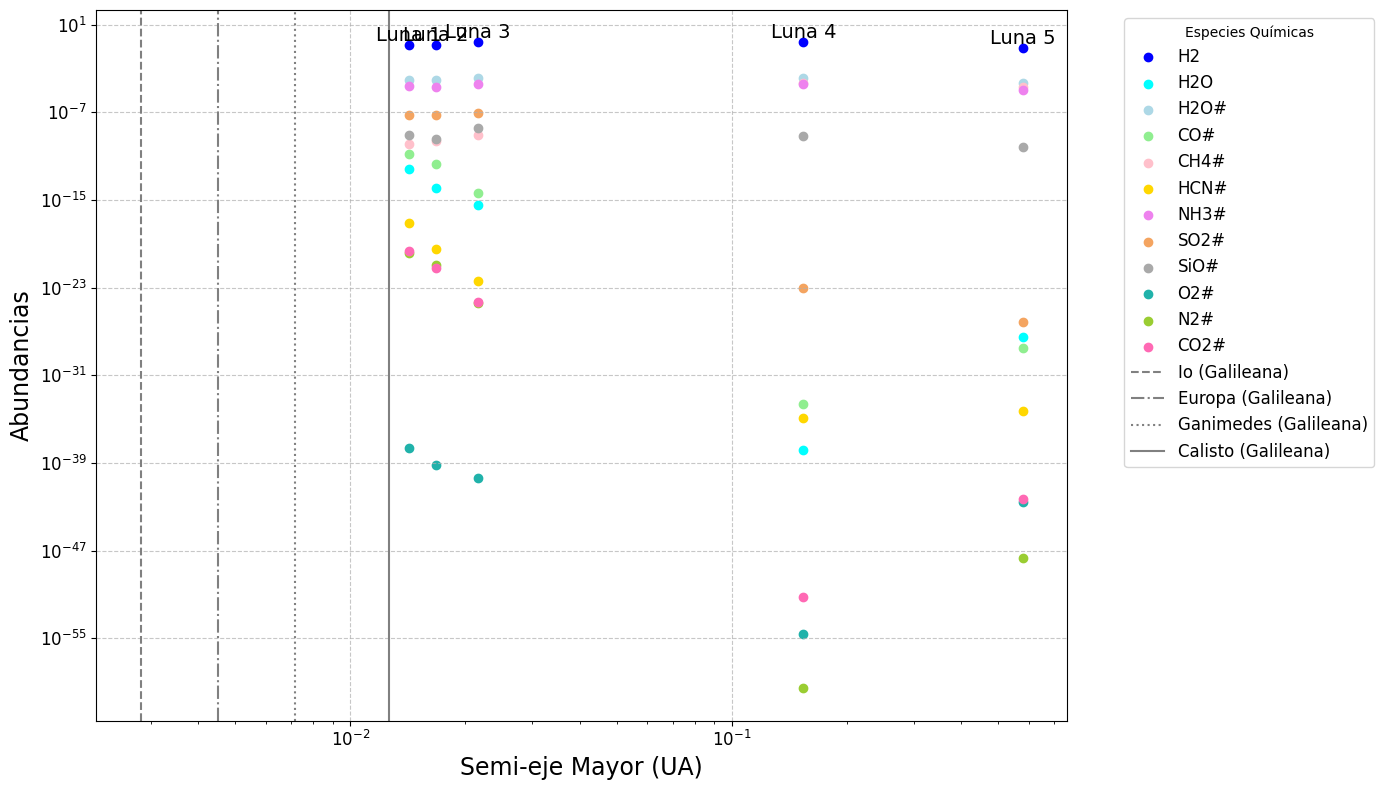

In [35]:
#Simulación 1- Alta Masa
lunas_sim1 = {"Luna 1": [0.14937252270512297, 6.813261976474737e-13, 8.737883604453954e-05, 
 1.5578430622356622e-11, 1.2863307418022275e-10, 7.275910438887437e-18, 
 2.3761930879538052e-05, 5.570353889098372e-08, 9.333939017211164e-10, 
 2.413317646533839e-38, 1.4511778670959552e-20, 2.1986692841205545e-20], 
              "Luna 2":
[0.14246366453443524, 1.300906088186924e-14, 8.588661197356844e-05, 
 1.8108532253525267e-12, 2.373634248876462e-10, 3.347841523247926e-20, 
 2.2664102212603936e-05, 5.3129934137597444e-08, 3.975844277413809e-10, 
 5.915717391628929e-40, 1.1869041973144856e-21, 6.47515371101738e-22], 
              "Luna 3":
[0.2519526737253444, 3.512193682504505e-16, 0.000152197103232508, 
 4.8317430956305674e-15, 8.114578935079197e-10, 3.831610438560408e-23, 
 4.008263368601736e-05, 9.396258687348156e-08, 4.190914184196065e-09, 
 3.9878167272995203e-41, 3.765471904719072e-25, 5.153080498434558e-25], 
              "Luna 4":
[0.24441761030464682, 1.6599465580618653e-38, 0.00014783138955884096, 
 2.5996626473114594e-34, 4.445122262943653e-05, 1.3012026926968854e-35, 
 3.888375598661852e-05, 9.01735610602563e-24, 7.474508463732075e-10, 
 2.2633279677841615e-55, 2.678891878830234e-60, 5.277181408118929e-52],
              "Luna 5":
[0.07419560945072624, 3.2228348726162706e-28, 4.4875968266825585e-05, 
 3.2896177775607657e-29, 2.051230663108019e-05, 5.290300790341545e-35, 
 1.180360004260347e-05, 6.771982580387479e-27, 7.333667079541334e-11, 
 2.609877022652424e-43, 2.18014073186607e-48, 5.038653248817254e-43]
             }


# Distancias radiales finales
radial_distances = [1.422893149548029416e-02,     
                    1.674999398325128022e-02,     
                    2.164512653729198932e-02,     
                    1.541877130296121501e-01,     
                    5.809263861976293741e-01]


# Galileanas
galileanas = {
    "Io": 2.82e-03,
    "Europa": 4.49e-03,
    "Ganimedes": 7.16e-03,
    "Calisto": 1.26e-02}

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim1[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim1[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje Y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 1 (Alta Masa)', fontsize=14)
plt.legend(fontsize=12, title="Especies Químicas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_alta_masa1.jpg", format="jpg")
plt.show()

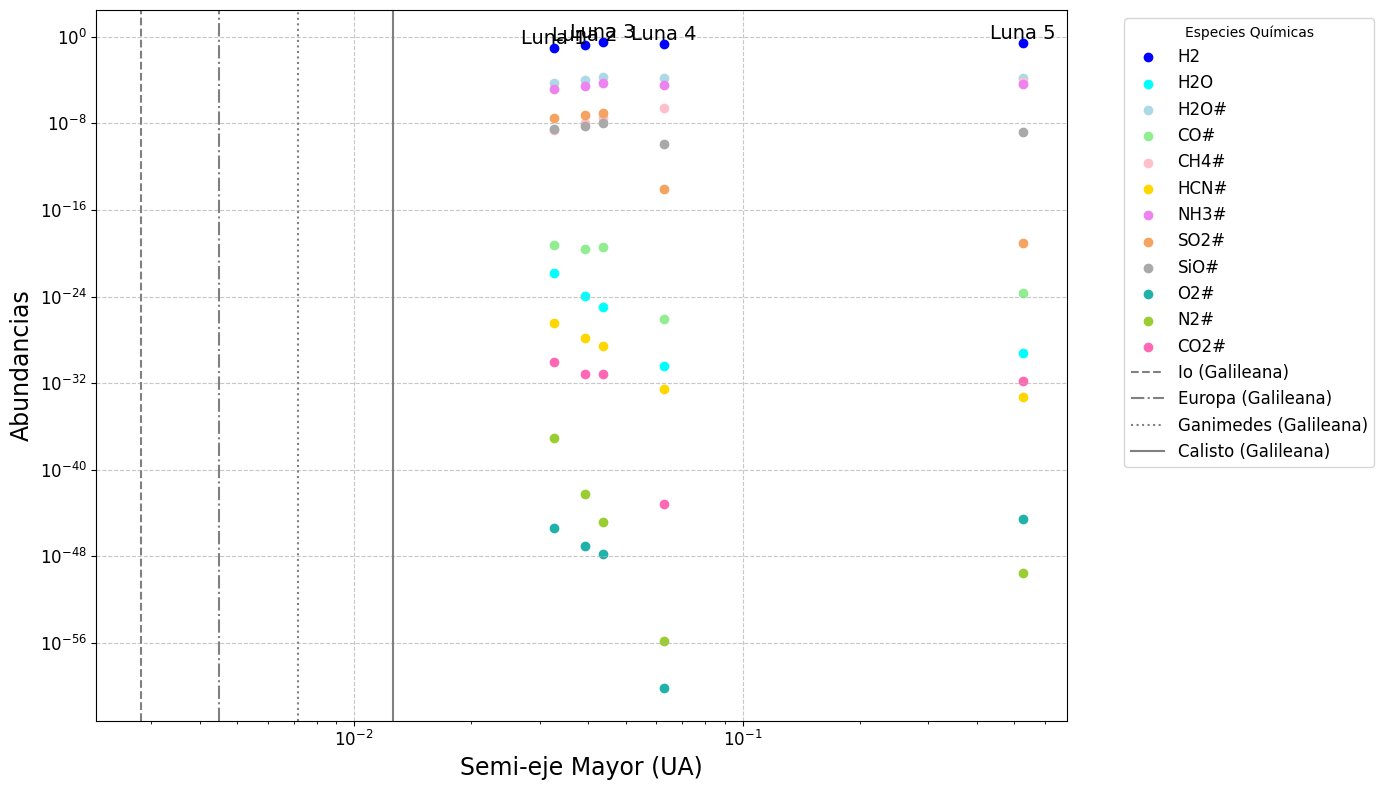

In [34]:
#Simulación 2- Alta Masa
# Datos de abundancias promedio por especie química
species = [
    "H2", "H2O", "H2O#", "CO#", "CH4#", "HCN#", "NH3#", "SO2#", "SiO#", "O2#", "N2#", "CO2#"
]

# Datos de abundancias promedio por especie química para la simulación 2
lunas_sim2 = {
    "Luna 1": [0.09164059539222037, 1.4189247056212122e-22, 5.5356128572938025e-05, 
               6.189272940528897e-20, 2.5080938548539055e-09, 3.3985512626298996e-27, 
               1.4578879431367039e-05, 3.4118431080301155e-08, 2.942786856204864e-09, 
               4.301777002636567e-46, 8.243677194828233e-38, 9.413998584063058e-31], 

    "Luna 2": [0.17464386009363456, 1.2037525702455318e-24, 0.00010550033197141912, 
               2.6582431814816753e-20, 1.189298334504109e-08, 1.374923383966961e-28, 
               2.7783522599903742e-05, 6.202118490236612e-08, 5.797155980876583e-09, 
               8.823404216429324e-48, 6.402537126536797e-43, 7.123287040084712e-32], 

    "Luna 3": [0.30683637401749725, 1.138052507508145e-25, 0.00018538262512738946, 
               3.6193433661551764e-20, 3.459349729796718e-08, 2.9919863325955316e-29, 
               4.8813858993186174e-05, 9.584557847618543e-08, 1.0547926169863206e-08, 
               1.8261932279330945e-48, 1.415772236007095e-45, 7.260806597709678e-32], 

    "Luna 4": [0.23463491726829083, 4.059944130146928e-31, 0.00014191485903263727, 
               8.725465830355062e-27, 2.640685689435978e-07, 2.8019947672423512e-33, 
               3.7327499934194225e-05, 9.168338385805036e-15, 1.2547531507285513e-10, 
               6.486007641512638e-61, 1.3754884228577258e-56, 7.022404785078755e-44], 

    "Luna 5": [0.2507579066856829, 5.595276962887451e-30, 0.0001516651265211057, 
               1.9369416065159213e-24, 6.932504177445402e-05, 5.270187394475504e-34, 
               3.989243772231409e-05, 8.49562844520022e-20, 1.7370014405549004e-09, 
               2.924582695219293e-45, 2.879291433591356e-50, 1.7413627391779555e-32]
}


# Distancias radiales finales
radial_distances = [
    3.260338989572346942e-02,  # Luna 1
    3.924939308051245587e-02,  # Luna 2
    4.364100623888772133e-02,  # Luna 3
    6.270194712674518090e-02,  # Luna 4
    5.273166461741880909e-01   # Luna 5
]

# Galileanas
galileanas = {
    "Io": 2.82e-03,
    "Europa": 4.49e-03,
    "Ganimedes": 7.16e-03,
    "Calisto": 1.26e-02
}

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim2[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim2[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje Y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 2 (Alta Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_alta_masa2.jpg", format="jpg")
plt.show()

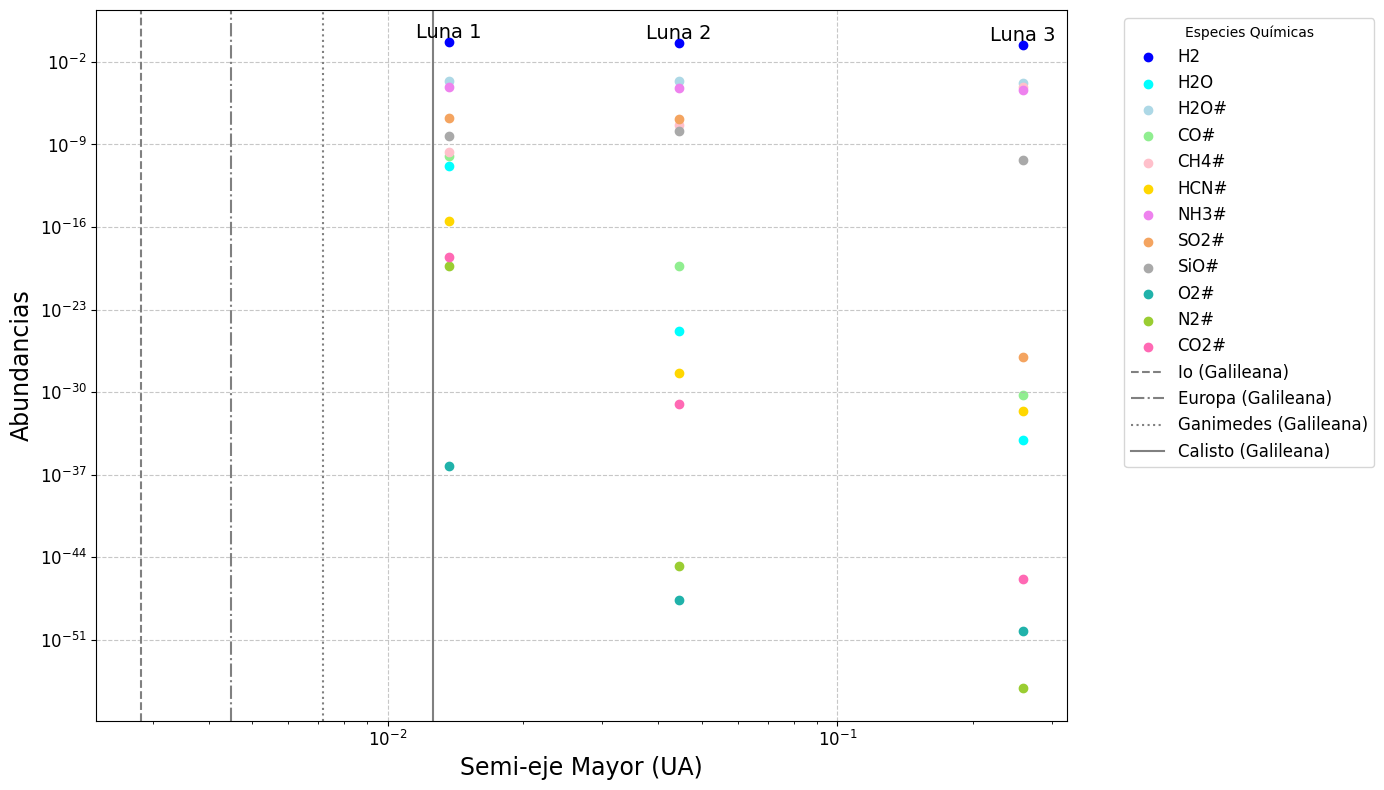

In [33]:
#Simulación 3 Alta Masa
# Datos de abundancias promedio por especie química para la nueva luna
lunas_sim3 = {
    "Luna 1": [0.4588653539922168, 1.4575869958013446e-11, 0.00025013136162605143, 
               1.0254851175247925e-10, 2.3832138562630903e-10, 3.589839183993932e-16, 
               7.298687241430982e-05, 1.7109772587140205e-07, 5.0378019391534916e-09, 
               5.393128800632538e-37, 4.6668682009580355e-20, 3.165053994950272e-19], 

    "Luna 2": [0.42131508254266414, 1.5626526929018462e-25, 0.00025454770888104673, 
               4.969697461536799e-20, 4.7500112123934014e-08, 4.108277490634555e-29, 
               6.702600073669047e-05, 1.3160495699489898e-07, 1.448329064355462e-08, 
               2.5075343594094573e-48, 1.943987893824241e-45, 9.969767570209686e-32], 

    "Luna 3": [0.24770467712225225, 9.407153870886709e-35, 0.0001498200238306669, 
               6.13257711351258e-31, 6.845865558994878e-05, 2.827091671910182e-32, 
               3.9406705364032125e-05, 9.989309118931903e-28, 5.010456606201717e-11, 
               5.276540350346215e-51, 8.053903499092223e-56, 1.6091504871150253e-46]
}


# Distancia radial final
radial_distances = [1.368219440927656572e-02, 4.444850572312095821e-02, 2.589348085621707707e-01]

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim3[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim3[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")


# Etiqueta de la luna
#plt.text(radial_distances[0], max(luna_sim3["Luna 1"]), "Luna 1", fontsize=11, ha='center', va='bottom')

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 3 (Alta Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_alta_masa3.jpg", format="jpg")
plt.show()

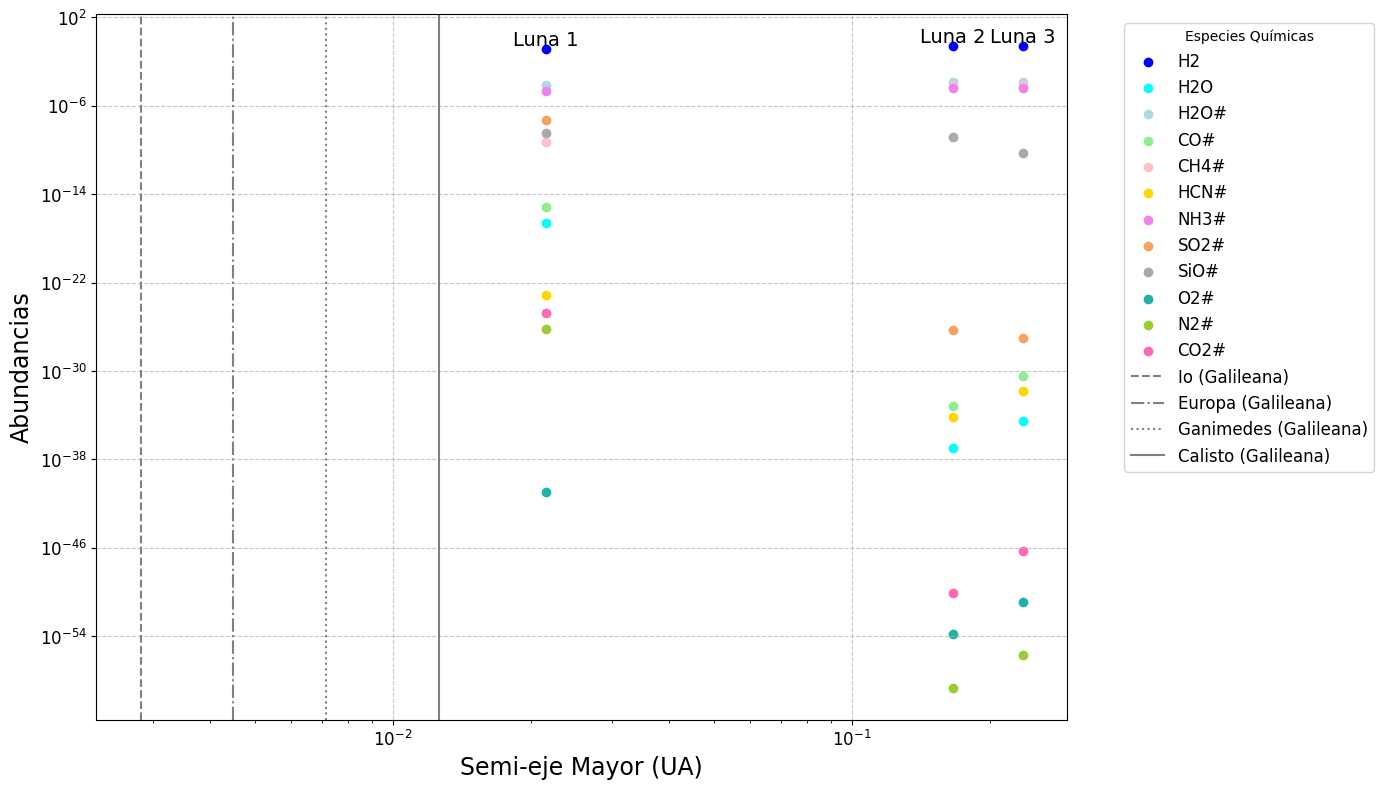

In [32]:
#Simulación 4- Alta Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim4 = {
    "Luna 1": [0.1349577288825435, 2.6088251316580997e-17, 8.152235898905694e-05, 
               7.217973802755856e-16, 5.68332014640478e-10, 6.815394531868175e-24, 
               2.1470063810916582e-05, 5.033067746902221e-08, 3.794475566620645e-09, 
               1.0280734190170375e-41, 6.93076993148727e-27, 1.934523542240829e-25], 

    "Luna 2": [0.24484448056723823, 9.932313151820625e-38, 0.00014808877786409914, 
               7.070236868581467e-34, 6.420130071016279e-05, 7.26237473162747e-35, 
               3.8951655308026925e-05, 4.8007767250846354e-27, 1.360091248331569e-09, 
               1.6977682584027112e-54, 2.173127713200971e-59, 7.611119435505075e-51], 

    "Luna 3": [0.23830879681344727, 2.919046696488951e-35, 0.00014413714590374174, 
               3.2632860816799755e-31, 6.585013481603968e-05, 1.5047749910757818e-32, 
               3.791195311961528e-05, 9.260222306589184e-28, 5.884758125196632e-11, 
               1.282342344676977e-51, 1.9494955214596935e-56, 4.795010752928589e-47]
}


# Distancias radiales finales
radial_distances = [
    2.152631891762140509e-02, 
    1.661431816761621827e-01, 
    2.364114262461782801e-01
]


# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim4[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim4[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')
# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 4 (Alta Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_alta_masa4.jpg", format="jpg")
plt.show()

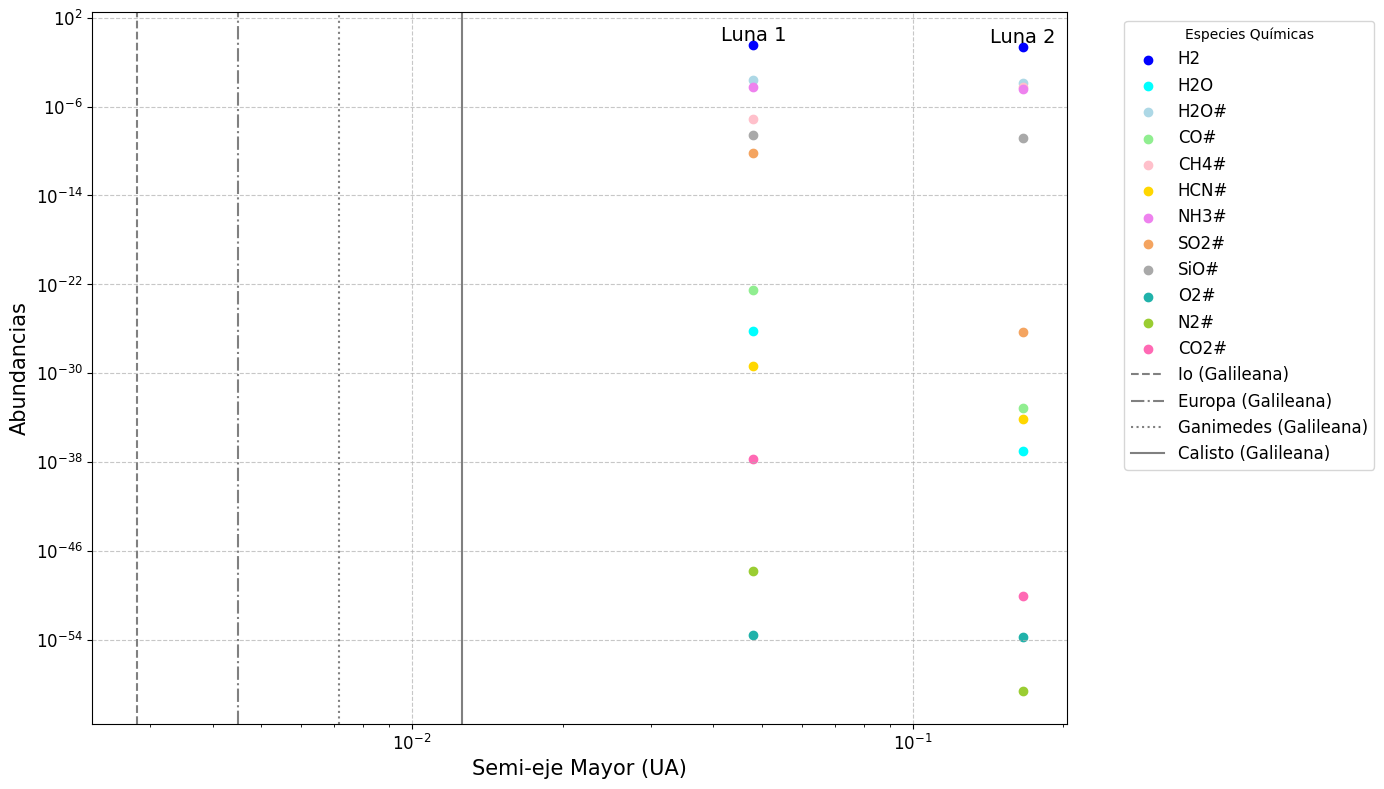

In [31]:
#Simulación 5 Alta Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim5 = {
    "Luna 1": [
        0.3832705760204407, 6.402517692808371e-27, 0.00023181257786762115, 
        3.0703346200552624e-23, 7.448355327918021e-08, 4.0590922700943206e-30, 
        6.097379262055101e-05, 5.982282891828372e-11, 3.052805749389185e-09, 
        2.654209203044457e-54, 1.5156511154389964e-48, 1.689211860790843e-38
    ],
    "Luna 2": [
        0.24459688119897136, 9.97648761610894e-38, 0.0001479390236451857, 
        7.085860344224821e-34, 6.414714737454713e-05, 7.277114557536827e-35, 
        3.8912265604173545e-05, 4.782835004653853e-27, 1.3582304939808703e-09, 
        1.7058231256247475e-54, 2.1836368231576655e-59, 7.639345237784254e-51
    ]
}


# Distancias radiales finales
radial_distances = [ 4.806962385107056007e-02, 1.661568967470896385e-01]

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim5[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim5[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')
# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")
    
# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=15)
plt.ylabel('Abundancias', fontsize=15)
#plt.title('Abundancias Promedio por Especie Química para Simulación 5 (Alta Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_alta_masa5.jpg", format="jpg")
plt.show()

In [55]:
#Simulaciones con Baja Masa

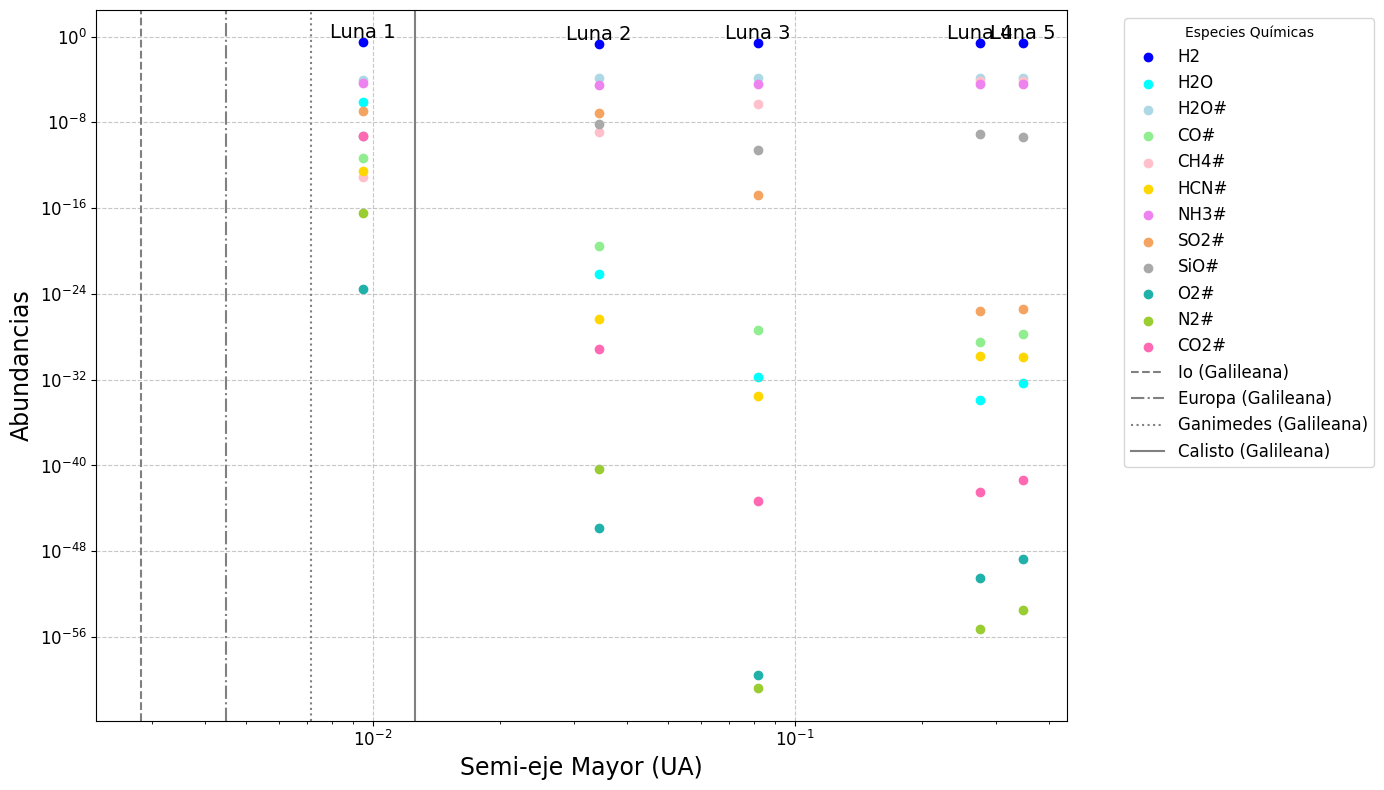

In [36]:
#Simulación 1 - Baja Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim6 = {
    "Luna 1": [
        0.2995920907255767, 7.315379686877178e-07, 9.907974996546674e-05,
        4.697990302814704e-12, 7.950476332625801e-14, 2.7094990459026106e-13,
        4.7584501988803e-05, 1.1160335377207614e-07, 5.594114355449854e-10,
        3.0583847746482816e-24, 3.259130776842461e-17, 5.280285955058914e-10
    ],
    "Luna 2": [
        0.21263407758932898, 6.992120362601309e-23, 0.00012844306922761673,
        2.70105933649022e-20, 1.3626276431049075e-09, 4.7611984219731575e-27,
        3.3827438232008e-05, 7.920873273506591e-08, 6.6621926451069816e-09,
        1.40438329646006e-46, 5.001058971888158e-41, 7.847633410937125e-30
    ],
    "Luna 3": [
        0.25195043229393216, 1.6217535599203193e-32, 0.0001523880277246856,
        4.17866941059085e-28, 4.803098145822016e-07, 2.9188691105194834e-34,
        4.008211513985468e-05, 1.7214341783544625e-15, 2.825340422602278e-11,
        2.979594136812145e-60, 1.618381142045432e-61, 5.119990385801277e-44
    ],
    "Luna 4": [
        0.24506704575292057, 1.1691062069097876e-34, 0.00014822415745120403,
        3.525935199148044e-29, 6.755344955393406e-05, 1.5967213810782615e-30,
        3.8987076950618774e-05, 2.763409656464386e-26, 7.943133526558274e-10,
        3.1437148849174186e-51, 5.607371851188201e-56, 3.598040213576659e-43
    ],
    "Luna 5": [
        0.24586672305855742, 4.6769799097915945e-33, 0.00014870828860764768,
        1.7239417656606677e-28, 6.795833322215209e-05, 1.2457676224001135e-30,
        3.9114360826534455e-05, 4.3215924867113934e-26, 4.6491677440502505e-10,
        2.0827782995610497e-49, 3.5725540509371383e-54, 4.848930792275343e-42
    ]
}


# Distancias radiales finales
radial_distances =[ 9.499892836267216298e-03,
    3.432958439863272038e-02,
    8.178534397755660157e-02,
    2.751990317307931866e-01,
    3.479523239866454398e-01
]


# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim6[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim6[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 1 (Baja Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_baja_masa1.jpg", format="jpg")
plt.show()

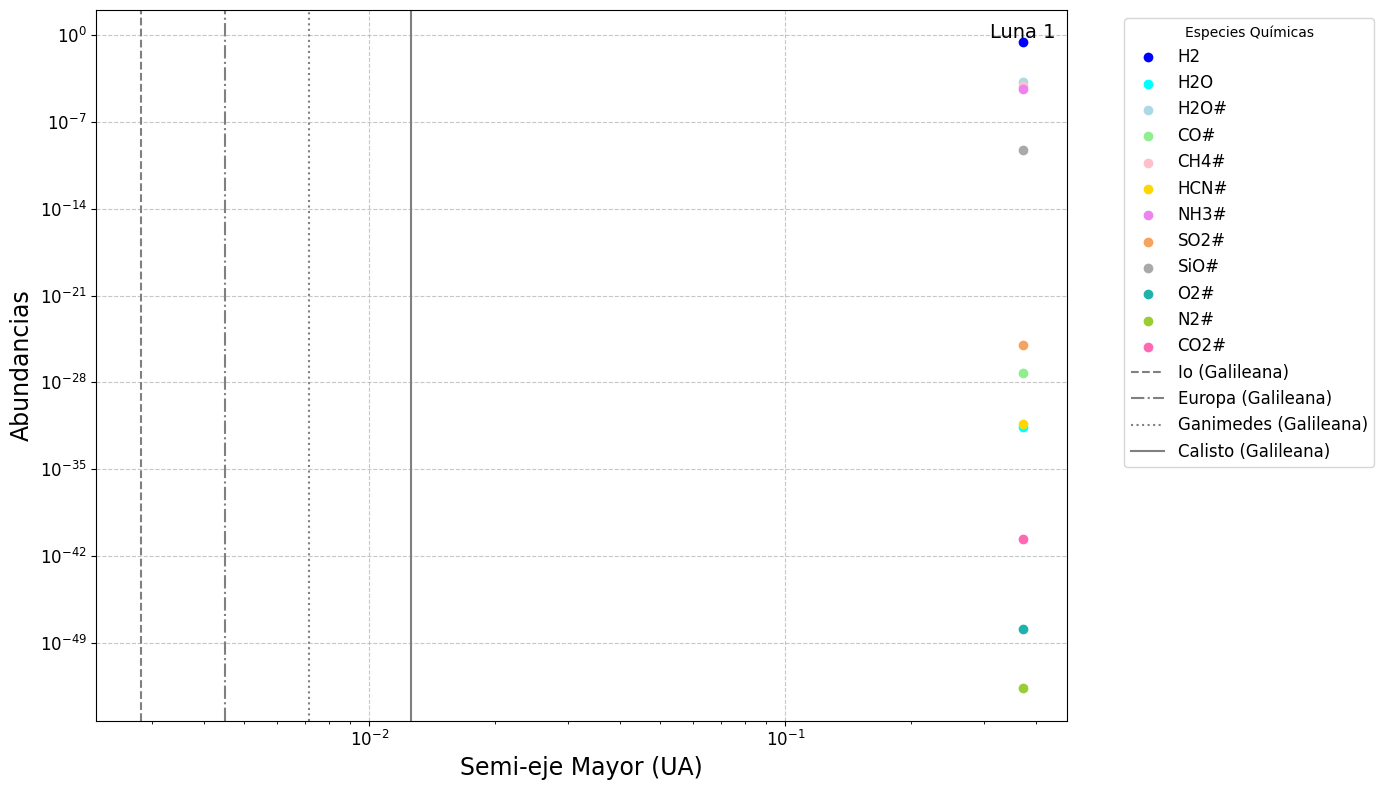

In [37]:
#Simulación 2 - Baja Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim7 = {
    "Luna 1": [
        0.2682662248039059,  # H2
        2.6047683839012125e-32,  # H2O
        0.00016225577881968202,  # H2O#
        5.74756628118411e-28,  # CO#
        7.416519772620744e-05,  # CH4#
        4.7680842314248097e-32,  # HCN#
        4.267787188300571e-05,  # NH3#
        1.0673472148552028e-25,  # SO2#
        6.034831900321038e-10,  # SiO#
        1.2666758568118967e-48,  # O2#
        2.1466296142210635e-53,  # N2#
        2.430542724428088e-41  # CO2#
    ]
}


# Distancias radiales finales
radial_distances = [3.729283918389691421e-01]

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim7[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim7[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 2 (Baja Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_baja_masa2.jpg", format="jpg")
plt.show()

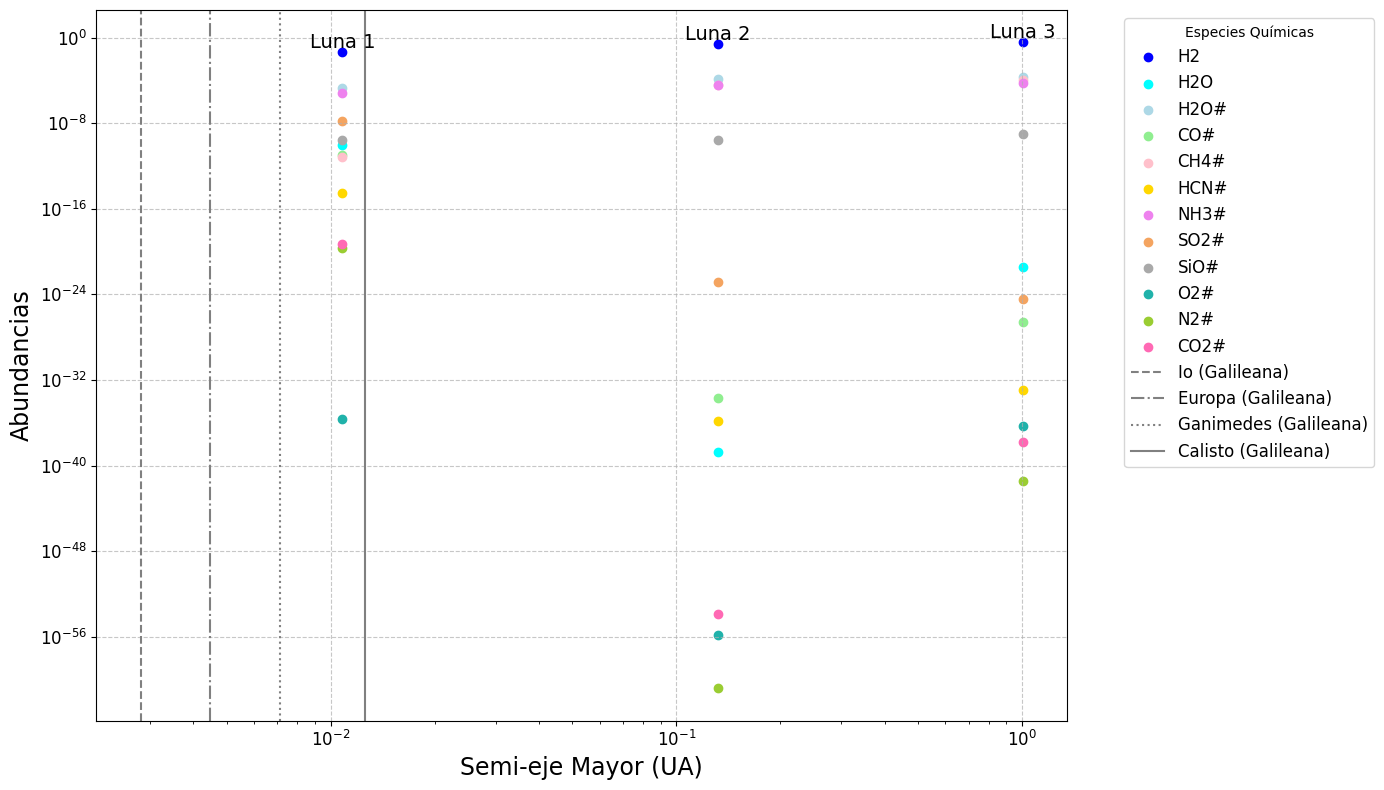

In [38]:
#Simulación 3- Baja Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim8= {
    "Luna 1": [0.046015052696789356, 8.7448384948123e-11, 2.085747380486201e-05, 
               1.173979092536803e-11, 6.531252091444046e-12, 2.944207854193538e-15, 
               7.317102439624996e-06, 1.7152958294866375e-08, 2.4360804737806286e-10, 
               2.2546807209524817e-36, 2.0445275019141573e-20, 5.356234430165154e-20],
    
    "Luna 2": [0.24485247301528879, 1.8702044800901948e-39, 0.00014809498312363196, 
               2.2954024275912235e-34, 3.4081709059201356e-05, 1.4433223164472956e-36, 
               3.895292593360096e-05, 1.4955508008047494e-23, 2.6109316942423213e-10, 
               1.5749536854382846e-56, 1.5199862658246933e-61, 1.2269175919089565e-54],
    
    "Luna 3": [0.3622222848810392, 3.4336585292687157e-22, 0.00021908329431872257, 
               2.5317511418747087e-27, 0.00010014062379274103, 1.0711853417044903e-33, 
               5.762497760676956e-05, 3.5611199488337517e-25, 1.0493092488899372e-09, 
               5.072511792020557e-37, 3.7771148637435213e-42, 1.629870094260815e-38]
}


# Distancias radiales finales
radial_distances = [
    1.081811523244444358e-02, 1.320162740933040757e-01, 1.007129601312429346e+00]

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim8[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim8[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 3 (Baja Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_baja_masa3.jpg", format="jpg")
plt.show()

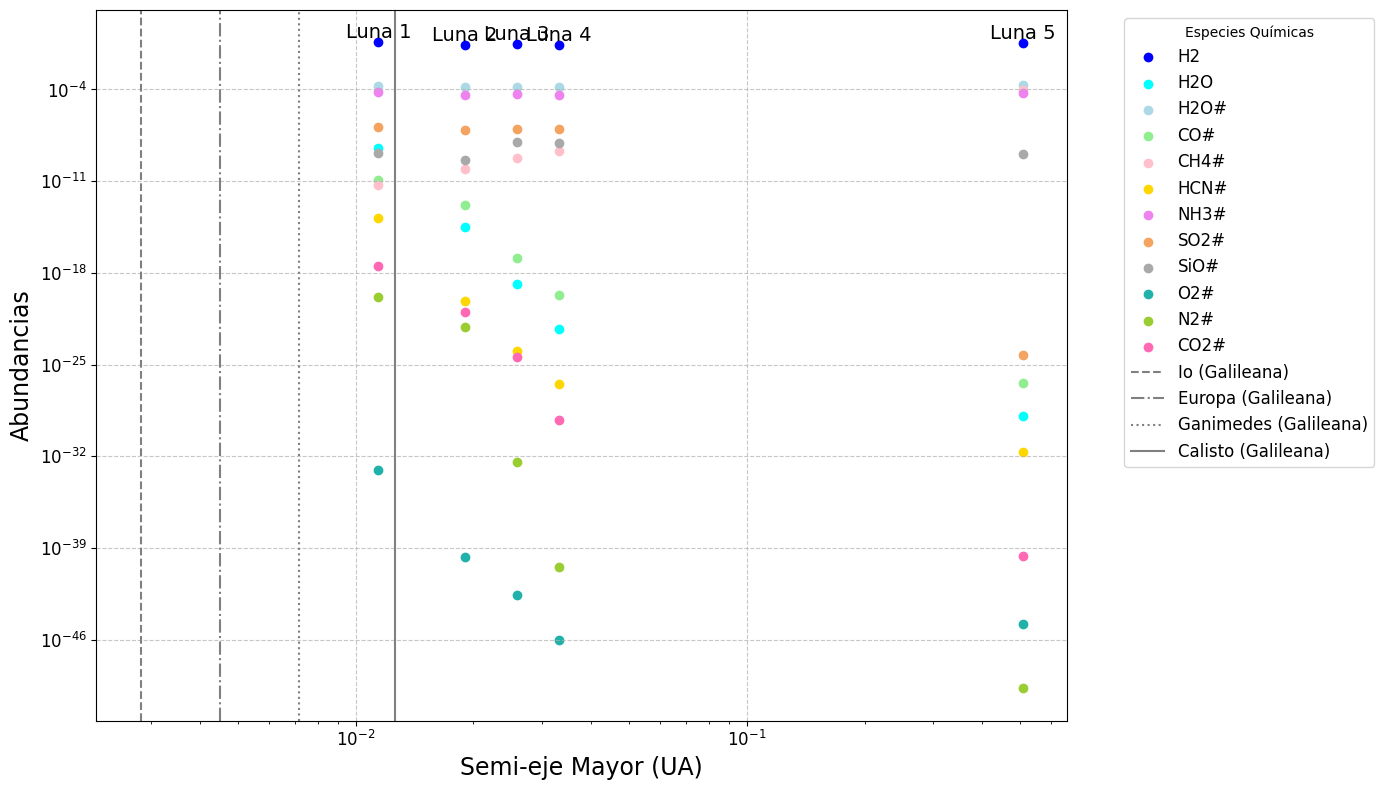

In [39]:
#Simulación 4 - Baja Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim9 = {
    "Luna 1": [0.3988729497549326, 3.6154974030103276e-09, 0.00017071100550021672,
               1.3446243581864612e-11, 5.073319638140868e-12, 1.658617557173827e-14,
               6.342209255890838e-05, 1.4867607045784038e-07, 1.4118841834045382e-09,
               8.993997945246255e-34, 1.3743759592907612e-20, 3.4202214258625386e-18],
    
    "Luna 2": [0.2365917579963707, 3.395635264180227e-15, 0.00014286110707282824,
               1.4064049287709875e-13, 8.74530386664698e-11, 6.93990075800172e-21,
               3.763883389304426e-05, 8.823373064342795e-08, 4.4276778936204036e-10,
               2.200148316478373e-40, 7.759243880256131e-23, 9.993959717019084e-22],
    
    "Luna 3": [0.279116055211043, 1.4596823361709937e-19, 0.00016860068911190947,
               1.460859227743197e-17, 5.952969565614735e-10, 1.083749088292224e-24,
               4.440380609753453e-05, 1.0409139856176213e-07, 9.448656674559472e-09,
               2.8282071341699354e-43, 3.493243110989576e-33, 4.219385631870083e-25],
    
    "Luna 4": [0.25184570842944376, 5.159481406515649e-23, 0.00015212984071284033,
               2.2059185339208685e-20, 2.033566654619556e-09, 3.668267643125345e-27,
               4.006550639697472e-05, 9.342905996965033e-08, 7.723695580332301e-09,
               1.0365847119672106e-46, 3.565244529779338e-41, 5.737277861224267e-30],
    
    "Luna 5": [0.3569443780680757, 1.2540385592857227e-29, 0.00021589116272353835,
               4.243078267515988e-27, 9.868144332514076e-05, 2.3460866837828051e-32,
               5.678538811665719e-05, 5.743192106207183e-25, 1.2684643516958443e-09,
               1.6128259589267744e-45, 2.019541571097942e-50, 2.568749532993534e-40]
}


# Distancias radiales finales
radial_distances = [
    1.143886993552147360e-02,
    1.899796751985211724e-02,
    2.583485103588470794e-02,
    3.307436732583866026e-02,
    5.088255708136956308e-01
]


# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim9[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim9[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')
# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")
    
# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 4 (Baja Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_baja_masa4.jpg", format="jpg")
plt.show()

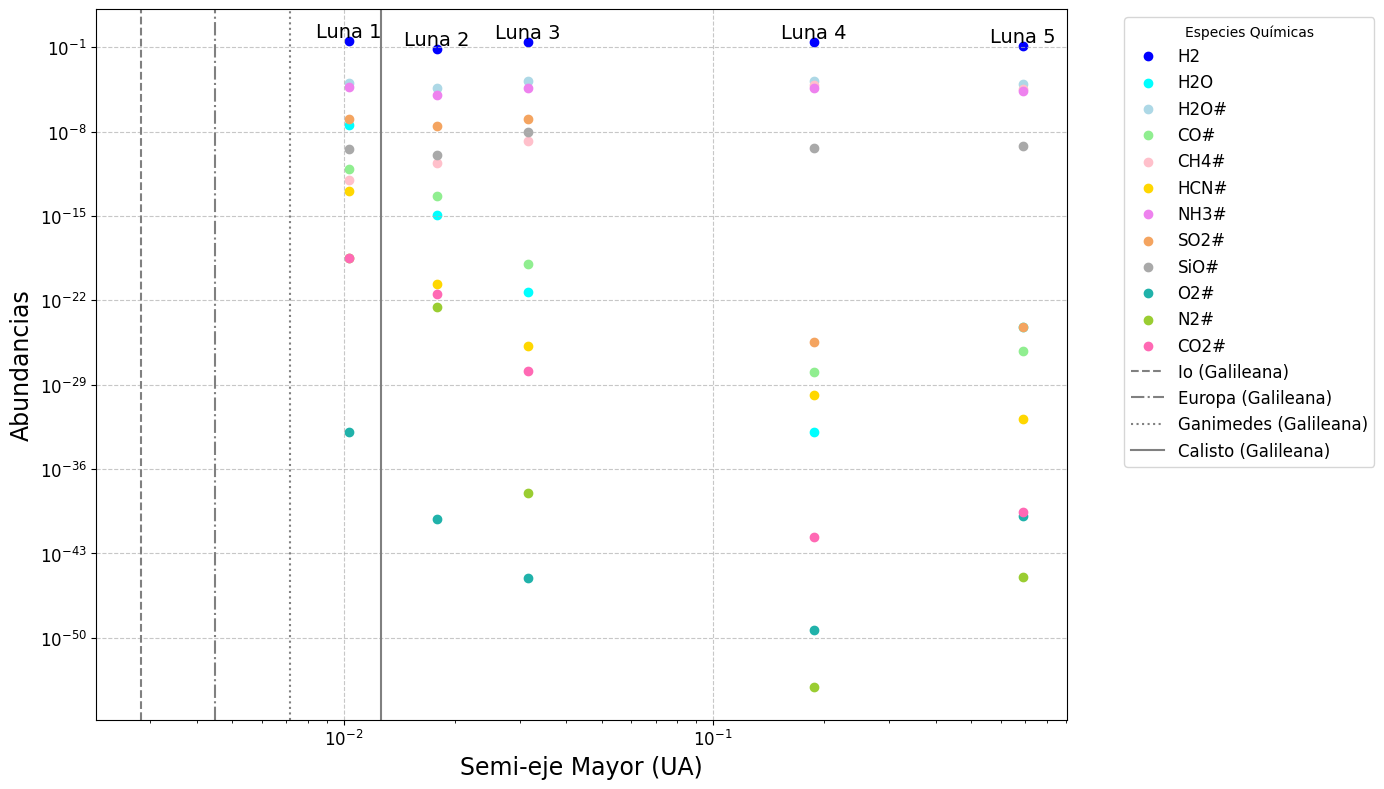

In [40]:
#Simulación 5 - Baja Masa
# Datos de abundancias promedio por especie química para las lunas
lunas_sim10 = {
    "Luna 1": [0.3070293562875642, 3.326151359781946e-08, 0.00011378794493578142, 
               8.010051702943993e-12, 1.0167681722132064e-12, 1.119835445045955e-13, 
               4.880728611313466e-05, 1.1442133038288096e-07, 3.6481605312577633e-10, 
               1.092485163220019e-33, 3.3835550329797074e-19, 3.3773109496744424e-19],

    "Luna 2": [0.071823893352745, 1.1607540361434531e-15, 4.3366935057229844e-05, 
               4.825275772773854e-14, 2.5206713170530675e-11, 2.3910295274564143e-21, 
               1.1426292775591984e-05, 2.678575016781791e-08, 1.1921022572665662e-10, 
               7.490761150799597e-41, 2.690861712840983e-23, 3.4470748175378996e-22],

    "Luna 3": [0.2749068808124006, 4.58739301209917e-22, 0.00016605919104454504, 
               1.0220057060043698e-19, 1.5870961591128195e-09, 1.6614491261776327e-26, 
               4.3734259367482005e-05, 1.0243231549739586e-07, 8.7252421681723e-09, 
               9.726646346694603e-46, 1.0535232716355213e-38, 1.4142692422711022e-28],

    "Luna 4": [0.2467289143592541, 1.2210776891326156e-33, 0.00014922970537740475, 
               1.1253043912443913e-28, 6.818668003597518e-05, 1.4779895596812739e-30, 
               3.9251489188989766e-05, 3.4272383259589e-26, 4.741542798538979e-10, 
               4.474602996280093e-50, 7.877073113054628e-55, 2.339477137226917e-42],

    "Luna 5": [0.13396262979676357, 5.633434429468296e-25, 8.102479325019565e-05, 
               5.975568921180436e-27, 3.703555843890718e-05, 1.524938576436501e-32, 
               2.1311720427626433e-05, 5.883644756440775e-25, 5.769937178362387e-10, 
               1.1980296860361797e-40, 1.0547531598695416e-45, 2.9553054215282077e-40]
}


# Distancias radiales finales
radial_distances = [
    1.035150286090589025e-02, 
    1.788836664220621566e-02, 
    3.152900208684328797e-02, 
    1.871900097719940043e-01, 
    6.902657716644491111e-01
]

# Crear la gráfica
plt.figure(figsize=(14, 8))

for especie_idx, especie in enumerate(species):
    abundancias = [lunas_sim10[f"Luna {i+1}"][especie_idx] for i in range(len(radial_distances))]
    plt.scatter(radial_distances, abundancias, color=color_map[especie], label=especie)

for i, distancia in enumerate(radial_distances):
    plt.text(distancia, max([lunas_sim10[f"Luna {i+1}"][especie_idx] for especie_idx in range(len(species))]), 
             f"Luna {i+1}", fontsize=14, ha='center', va='bottom')

# Graficar galileanas con separaciones en líneas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='gray', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Configuración de la gráfica
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)  # Tamaño de los ticks en el eje X
plt.yticks(fontsize=12)  # Tamaño de los ticks en el eje y
plt.xlabel('Semi-eje Mayor (UA)', fontsize=17)
plt.ylabel('Abundancias', fontsize=17)
#plt.title('Abundancias Promedio por Especie Química para Simulación 5 (Baja Masa)', fontsize=14)
plt.legend(title="Especies Químicas", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("abundancias_baja_masa5.jpg", format="jpg")
plt.show()

In [61]:
#Calculo de abundancias por especies

In [43]:
#Cálculo abundancias
# Lista de archivos con rangos de radios
#26-30 alta masa
#31-35 baja masa

radii_files = [
    "rangos_radios2/altamasa1.txt",
    "rangos_radios2/altamasa2.txt",
    "rangos_radios2/altamasa3.txt",
    "rangos_radios2/altamasa4.txt",
    "rangos_radios2/altamasa5.txt",
    "rangos_radios2/bajamasa6.txt",
    "rangos_radios2/bajamasa7.txt",
    "rangos_radios2/bajamasa8.txt",
    "rangos_radios2/bajamasa9.txt",
    "rangos_radios2/bajamasa10.txt"
]

# Lista de especies químicas
species_list = ['H2', 'H2O', 'H2O#', 'CO', 'CO#', 'CH4', 'CH4#', 'HCN', 'HCN#', 'NH3', 'NH3#',
                'SO2', 'SO2#', 'SiO', 'SiO#', 'O2', 'O2#', 'N2', 'N2#', 'CO2', 'CO2#']

# Procesar cada archivo
for file_idx, file_path in enumerate(radii_files, start=1):
    # Cargar el archivo con los rangos de radios
    radii_ranges = pd.read_csv(file_path, sep=" ", header=None, names=["radio_max", "radio_min"])
    
    # Resultados de las abundancias promedio
    results = []

    # Iterar sobre cada rango de radio
    for index, row in radii_ranges.iterrows():
        radio_min = row['radio_min']
        radio_max = row['radio_max']
        range_value = f"Archivo_{file_idx}_Rango_{index + 1}: {radio_min:.2e} - {radio_max:.2e}"  # Formato para identificar cada rango

        for species_name in species_list:
            species_data = {"Especie": species_name}
            for i, model in enumerate(models):  # Iterar sobre los modelos cargados
                try:
                    # Obtener datos de abundancia y radios
                    abundance_data = model.getAbun(species_name)
                    x = model.x  # Radios

                    # Calcular el promedio de radios
                    if len(x.shape) > 1:  # Si x es bidimensional
                        r_values = x.mean(axis=1)
                    else:
                        r_values = x

                    # Filtrar datos dentro del rango
                    mask = (r_values >= radio_min) & (r_values <= radio_max)
                    filtered_abundance = abundance_data[mask, :]  # Filtrar por radios

                    # Calcular el promedio de abundancia dentro del rango
                    if filtered_abundance.size > 0:
                        avg_abundance = filtered_abundance.mean()
                    else:
                        avg_abundance = float('nan')  # Si no hay datos en el rango

                    species_data[f"Modelo_{i + 1}"] = avg_abundance

                except Exception as e:
                    print(f"Error al procesar la especie '{species_name}' en el modelo {i + 1}: {e}")
                    species_data[f"Modelo_{i + 1}"] = None

            # Agregar el rango utilizado como columna
            species_data["Rango"] = range_value
            results.append(species_data)

    # Crear tabla de resultados
    results_df = pd.DataFrame(results)

    # Reordenar columnas para claridad
    column_order = ["Especie"] + [col for col in results_df.columns if col.startswith("Modelo_")] + ["Rango"]
    results_df = results_df[column_order]

    # Guardar los resultados en un archivo CSV etiquetado
    output_file = f"abundancias_promedio_archivo_{file_idx}.csv"
    results_df.to_csv(output_file, index=False)
    print(f"Resultados guardados en '{output_file}'.")

Resultados guardados en 'abundancias_promedio_archivo_1.csv'.
Resultados guardados en 'abundancias_promedio_archivo_2.csv'.
Resultados guardados en 'abundancias_promedio_archivo_3.csv'.
Resultados guardados en 'abundancias_promedio_archivo_4.csv'.
Resultados guardados en 'abundancias_promedio_archivo_5.csv'.
Resultados guardados en 'abundancias_promedio_archivo_6.csv'.
Resultados guardados en 'abundancias_promedio_archivo_7.csv'.
Resultados guardados en 'abundancias_promedio_archivo_8.csv'.
Resultados guardados en 'abundancias_promedio_archivo_9.csv'.
Resultados guardados en 'abundancias_promedio_archivo_10.csv'.


In [44]:
#Usando método de interpolación

In [45]:
# Lista de archivos con rangos de radios
radii_files = [
    "rangos_radios2/altamasa1.txt",
    "rangos_radios2/altamasa2.txt",
    "rangos_radios2/altamasa3.txt",
    "rangos_radios2/altamasa4.txt",
    "rangos_radios2/altamasa5.txt",
    "rangos_radios2/bajamasa6.txt",
    "rangos_radios2/bajamasa7.txt",
    "rangos_radios2/bajamasa8.txt",
    "rangos_radios2/bajamasa9.txt",
    "rangos_radios2/bajamasa10.txt"
]

# Lista de especies químicas
species_list = ['H2', 'H2O', 'H2O#', 'CO#', 'CH4#', 'HCN#', 'NH3#', 'SO2#', 'SiO#', 'O2#', 'N2#', 'CO2#']

# Procesar cada archivo
for file_idx, file_path in enumerate(radii_files, start=1):
    # Leer los rangos de radios
    try:
        radii_ranges = pd.read_csv(file_path, sep=" ", header=None, names=["radio_max", "radio_min"])
        print(f"Procesando el archivo: {file_path}")
    except Exception as e:
        print(f"Error al leer el archivo {file_path}: {e}")
        continue

    # Resultados de las abundancias promedio
    results = []

    # Iterar sobre cada rango de radio
    for index, row in radii_ranges.iterrows():
        # Asegurar que los valores estén en el orden correcto
        radio_min, radio_max = min(row['radio_min'], row['radio_max']), max(row['radio_min'], row['radio_max'])
        
        range_value = f"Archivo_{file_idx}_Rango_{index + 1}: {radio_min:.2e} - {radio_max:.2e}"
        print(f"\nRango: {range_value}")

        for species_name in species_list:
            species_data = {"Especie": species_name, "Rango": range_value}
            for i, model in enumerate(models):  # Iterar sobre los modelos cargados
                try:
                    # Obtener datos de abundancia y radios
                    abundance_data = np.ravel(model.getAbun(species_name))  # Convertir a 1D
                    x = np.ravel(model.x)  # Asegurar que x es unidimensional

                    # Verificar que x y abundance_data tengan el mismo tamaño
                    if len(x) != len(abundance_data):
                        print(f"⚠️ Advertencia: Dimensiones no coinciden en Modelo {i + 1} para {species_name}: len(x)={len(x)}, len(abundance_data)={len(abundance_data)}")
                        continue  # Saltar esta especie si hay un problema de dimensiones

                    # Crear interpolador
                    interpolator = interp1d(x, abundance_data, kind='linear', bounds_error=False, fill_value="extrapolate")

                    # Generar radios interpolados con alta resolución
                    high_res_r_values = np.linspace(radio_min, radio_max, num=1000)  # Resolución alta: 1000 puntos
                    high_res_abundances = interpolator(high_res_r_values)

                    # Calcular el promedio de abundancia dentro del rango interpolado
                    if len(high_res_abundances) > 0:
                        avg_abundance = np.mean(high_res_abundances)
                    else:
                        avg_abundance = float('nan')  # Si no hay datos en el rango

                    species_data[f"Modelo_{i + 1}"] = avg_abundance

                    # Imprimir detalles de depuración
                    print(f"Especie: {species_name}, Modelo: {i + 1}, Abundancia promedio: {avg_abundance:.2e}")

                except Exception as e:
                    print(f"Error al procesar '{species_name}' en el modelo {i + 1}: {e}")
                    species_data[f"Modelo_{i + 1}"] = None

            # Agregar datos procesados
            results.append(species_data)

    # Crear DataFrame de resultados
    results_df = pd.DataFrame(results)

    # Reordenar columnas para claridad
    column_order = ["Especie"] + [col for col in results_df.columns if col.startswith("Modelo_")] + ["Rango"]
    results_df = results_df[column_order]

    # Guardar resultados en un archivo CSV
    output_file = f"abundancias_promedio_archivo_{file_idx}.csv"
    try:
        results_df.to_csv(output_file, index=False)
        #print(f"Resultados guardados en '{output_file}'.")
    except Exception as e:
        print(f"Error al guardar el archivo {output_file}: {e}")

Procesando el archivo: rangos_radios2/altamasa1.txt

Rango: Archivo_1_Rango_1: 1.40e-02 - 1.42e-02
Especie: H2, Modelo: 1, Abundancia promedio: 1.49e-01
Especie: H2, Modelo: 2, Abundancia promedio: 1.49e-01
Especie: H2O, Modelo: 1, Abundancia promedio: 6.81e-13
Especie: H2O, Modelo: 2, Abundancia promedio: 1.52e-12
Especie: H2O#, Modelo: 1, Abundancia promedio: 8.74e-05
Especie: H2O#, Modelo: 2, Abundancia promedio: 8.51e-05
Especie: CO#, Modelo: 1, Abundancia promedio: 1.56e-11
Especie: CO#, Modelo: 2, Abundancia promedio: 3.84e-12
Especie: CH4#, Modelo: 1, Abundancia promedio: 1.29e-10
Especie: CH4#, Modelo: 2, Abundancia promedio: 1.64e-11
Especie: HCN#, Modelo: 1, Abundancia promedio: 7.28e-18
Especie: HCN#, Modelo: 2, Abundancia promedio: 4.23e-18
Especie: NH3#, Modelo: 1, Abundancia promedio: 2.38e-05
Especie: NH3#, Modelo: 2, Abundancia promedio: 2.38e-05
Especie: SO2#, Modelo: 1, Abundancia promedio: 5.57e-08
Especie: SO2#, Modelo: 2, Abundancia promedio: 5.57e-08
Especie: SiO#

# Ecuaciones para el cálculo de la masa del disco

La masa total del disco se calcula mediante la integral de la densidad superficial radial, definida como:

$$
M_\text{disk} = 2 \cdot 2\pi \int \Sigma(r) \, r \, dr
$$

Donde la densidad superficial Sigma(r) se define como:

$$
\Sigma(r) = \Sigma(10 \, \text{au}) \left( \frac{r}{10 \, \text{au}} \right)^{-q} = \Sigma(1 \, \text{au}) \left( \frac{r}{1 \, \text{au}} \right)^{-q}
$$

In [15]:
#Para r=1 au Para E_10 = 70 g cm^-2
q = 1
E_10 = 70*(1/10)**(-q)
E_10

700.0

In [16]:
#Para r=1 au, E_1 =1700 g cm^-2 (de literatura)
q = 1
E_1 = 1700*(1)**(-q)
E_1

1700.0

In [17]:
# Constantes
autocm = 1.496e13  # Conversión de AU a cm
msuntog = 1.989e33  # Conversión de masas solares a gramos

In [18]:
# Cálculo para MMSN
rmin = 0.4  # AU
rmax = 30   # AU
E_10 = 50  # g/cm^2
q = 1.5

# Rango radial en cm (log-espaciado)
r_arr = np.logspace(np.log10(rmin), np.log10(rmax), 100) * autocm  # cm

# Perfil de densidad superficial
sigma = E_10 * (r_arr / (10 * autocm)) ** -q  # g/cm^2

# Masa del disco (integración)
M_disk = 2 * np.pi * np.trapz(sigma * r_arr, x=r_arr)  # g
M_disk_Msun = M_disk / msuntog  # Conversión a masas solares
print(f"Masa del disco (MMSN): {M_disk_Msun:.6f} Msun")

Masa del disco (MMSN): 0.010833 Msun


/tmp/ipykernel_5916/274658336.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  M_disk = 2 * np.pi * np.trapz(sigma * r_arr, x=r_arr)  # g


In [22]:
# Cálculo para CPD Alta masa E_10=25; Baja masa E_10=2.5

amin = 0.007  # AU
amax = 1.2    # AU
E_10 =  25  # g/cm^2
q = 1.0

# Rango radial en cm (log-espaciado)
r_arr_cpd = np.logspace(np.log10(amin), np.log10(amax), 100) * autocm  # cm

# Perfil de densidad superficial para el CPD
sigma_cpd = E_10 * (r_arr_cpd / (10 * autocm)) ** -q  # g/cm^2

# Masa del disco (integración para el CPD)
M_disk_cpd = 2 * np.pi * np.trapz(sigma_cpd * r_arr_cpd, x=r_arr_cpd)  # g
M_disk_cpd_Msun = M_disk_cpd / msuntog  # Conversión a masas solares
print(f"Masa del disco (CPD): {M_disk_cpd_Msun:.6f} Msun")

Masa del disco (CPD): 0.000211 Msun


/tmp/ipykernel_5916/450128156.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  M_disk_cpd = 2 * np.pi * np.trapz(sigma_cpd * r_arr_cpd, x=r_arr_cpd)  # g


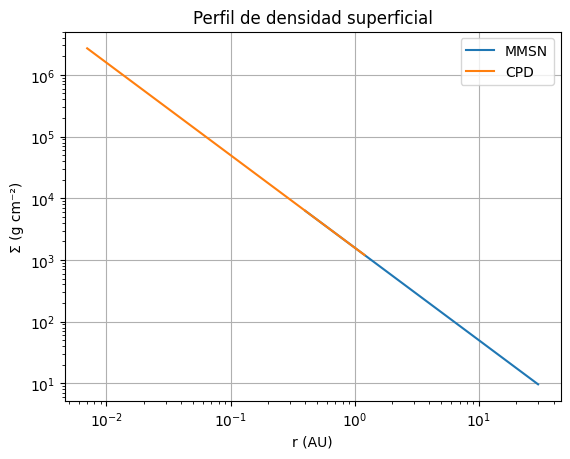

In [34]:
# Graficar perfil de densidad superficial
plt.plot(r_arr / autocm, sigma, label='MMSN')  # Conversión a AU
plt.plot(r_arr_cpd / autocm, sigma_cpd, label='CPD')  # Conversión a AU
plt.xlabel("r (AU)")
plt.ylabel("Σ (g cm⁻²)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title("Perfil de densidad superficial")
plt.show()

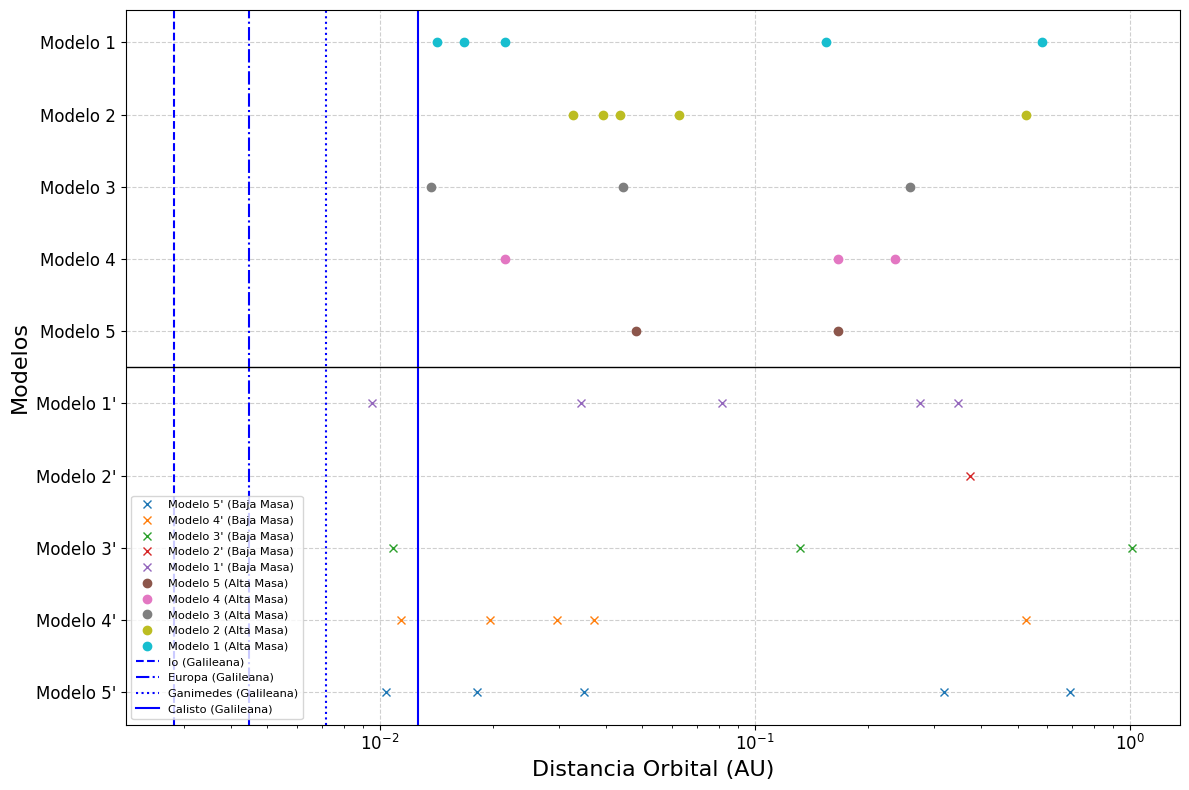

In [13]:
# Datos de las distancias iniciales en AU (por reemplazar con las finales según modelos de Jimena)
alta_masa = {
    "Modelo 1": [1.42e-2, 1.67e-2, 2.16e-2, 1.54e-1, 5.81e-1],
    "Modelo 2": [3.26e-2, 3.92e-2, 4.36e-2, 6.27e-2, 5.27e-1],
    "Modelo 3": [1.37e-2, 4.44e-2, 2.59e-1],
    "Modelo 4": [2.15e-2, 1.66e-1, 2.36e-1],
    "Modelo 5": [4.81e-2, 1.66e-1]
}

baja_masa = {
    "Modelo 1'": [9.50e-3, 3.43e-2, 8.18e-2, 2.75e-1, 3.48e-1],
    "Modelo 2'": [3.73e-1],
    "Modelo 3'": [1.08e-2, 1.32e-1, 1.01e+0],
    "Modelo 4'": [1.14e-2, 1.97e-2, 2.96e-2, 3.72e-2, 5.26e-1],
    "Modelo 5'": [1.04e-2, 1.81e-2, 3.50e-2, 3.19e-1, 6.91e-1]
}

# Lunas galileanas (en AU)
galileanas = {
    "Io": 2.82e-3,
    "Europa": 4.49e-3,
    "Ganimedes": 7.16e-3,
    "Calisto": 1.26e-2
}

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Lista combinada de modelos para mantener orden y consistencia
modelos_juntos = [
    "Modelo 5'", "Modelo 4'", "Modelo 3'", "Modelo 2'", "Modelo 1'",
    "Modelo 5", "Modelo 4", "Modelo 3", "Modelo 2", "Modelo 1",
]

# Graficar modelos
for modelo in modelos_juntos:
    if modelo in alta_masa:
        plt.plot(alta_masa[modelo], [modelo] * len(alta_masa[modelo]), 'o', label=f"{modelo} (Alta Masa)")
    if modelo in baja_masa:
        plt.plot(baja_masa[modelo], [modelo] * len(baja_masa[modelo]), 'x', label=f"{modelo} (Baja Masa)")

# Graficar líneas verticales para las lunas galileanas en azul
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='blue', linestyle=linestyles[i % len(linestyles)],
                linewidth=1.5, label=f"{nombre} (Galileana)")

# Línea divisoria horizontal
plt.axhline(y=4.5, color='black', linestyle='-', linewidth=1)

# Configuración de la gráfica
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Distancia Orbital (AU)', fontsize=16)
plt.ylabel('Modelos', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower left', fontsize=8.2, frameon=True)
plt.tight_layout()

# Guardar y mostrar
plt.savefig("comparacion_modelos_distancias.pdf", format="pdf")
plt.show()

In [14]:
# Listas de masa final (en Mearth) para cada modelo datos de simulación de PsyCo

alta_masa = {
    "Modelo 1": [
        9.844850421527799687e-04,
        1.120825810359179055e-03,
        1.111364339888842520e-02,
        3.112342790979331919e-02,
        2.087927751724389023e-05
    ],
    "Modelo 2": [
        1.594709191035003845e-02,
        1.830050351945950934e-02,
        1.982992475674934946e-02,
        2.452150857983363338e-02,
        8.320562230108463631e-02
    ],
    "Modelo 3": [
        9.657513498660121824e-04,
        2.011478162483592430e-02,
        6.088469477780902167e-02
    ],
    "Modelo 4": [
        1.167748180679714642e-02,
        4.435628846050784779e-02,
        5.994745805375722297e-02
    ],
    "Modelo 5": [
        2.133170127928857990e-02,
        4.437452752010885570e-02
    ]
}

baja_masa = {
    "Modelo 1'": [
        7.345771479195953389e-04,
        1.579787095918286366e-02,
        2.381430772392021875e-02,
        3.989183340385750454e-02,
        3.699396082955159343e-02
    ],
    "Modelo 2'": [
        2.612377164727744936e-04
    ],
    "Modelo 3'": [
        8.043497467935980909e-04,
        3.309072130865703398e-02,
        7.686152471523524017e-07
    ],
    "Modelo 4'": [
        8.443759320561670207e-04,
        1.062495267038455690e-02,
        1.335464410620900225e-02,
        1.607325425355926943e-02,
        5.127624896028268894e-05
    ],
    "Modelo 5'": [
        7.834315513812559889e-04,
        1.179475961722406714e-03,
        1.551264508624688489e-02,
        4.461651795533433384e-02,
        2.082979884167761742e-06
    ]
}

<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5891/265555016.py:27: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Masa Total ($M_{\oplus}$)', fontsize=16)


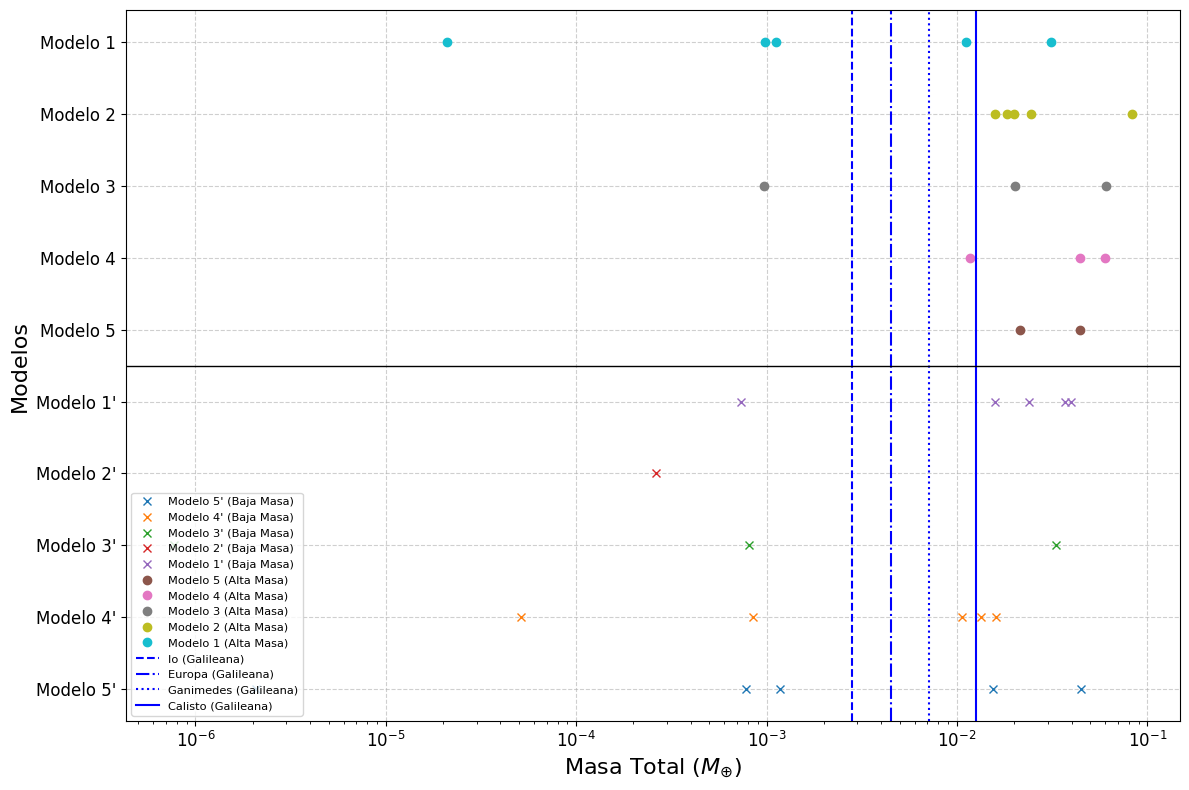

In [15]:
# Definir el orden de los modelos de alta y baja masa en el eje Y
orden_modelos = ["Modelo 5'", "Modelo 4'", "Modelo 3'", "Modelo 2'", "Modelo 1'",
                 "Modelo 5", "Modelo 4", "Modelo 3", "Modelo 2", "Modelo 1"]

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar alta y baja masa en orden descendente
for modelo in orden_modelos:
    if modelo in alta_masa:
        plt.plot(alta_masa[modelo], [modelo] * len(alta_masa[modelo]), 'o', label=f"{modelo} (Alta Masa)")
    if modelo in baja_masa:
        plt.plot(baja_masa[modelo], [modelo] * len(baja_masa[modelo]), 'x', label=f"{modelo} (Baja Masa)")

# Graficar las líneas de las Galileanas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, distancia) in enumerate(galileanas.items()):
    plt.axvline(distancia, color='blue', linestyle=linestyles[i % len(linestyles)], label=f"{nombre} (Galileana)")

# Añadir línea divisoria entre modelos 1'-5' y 1-5
plt.axhline(y=4.5, color='black', linestyle='-', linewidth=1)  # Línea horizontal divisoria

# Configuración de la gráfica
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(range(len(orden_modelos)), orden_modelos, fontsize=12)  # Orden descendente
plt.xlabel('Masa Total ($M_{\oplus}$)', fontsize=16)
plt.ylabel('Modelos', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower left', fontsize=8.2, frameon=True)
plt.tight_layout()
plt.savefig("comparacion_modelos_masas_ordenados.pdf", format="pdf")
plt.show()

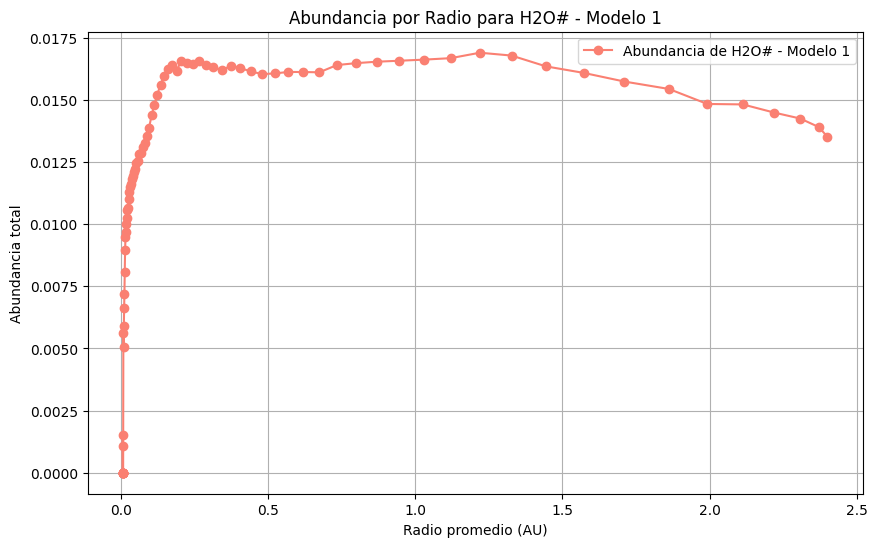

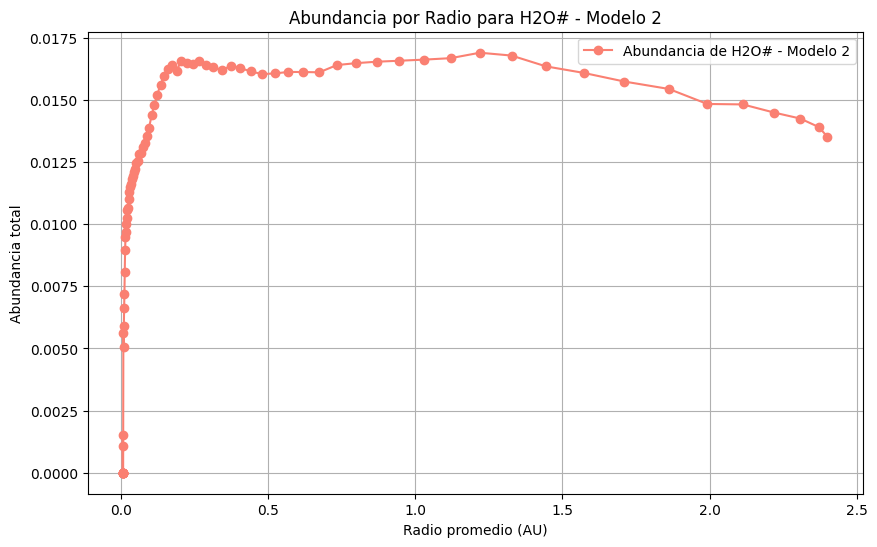

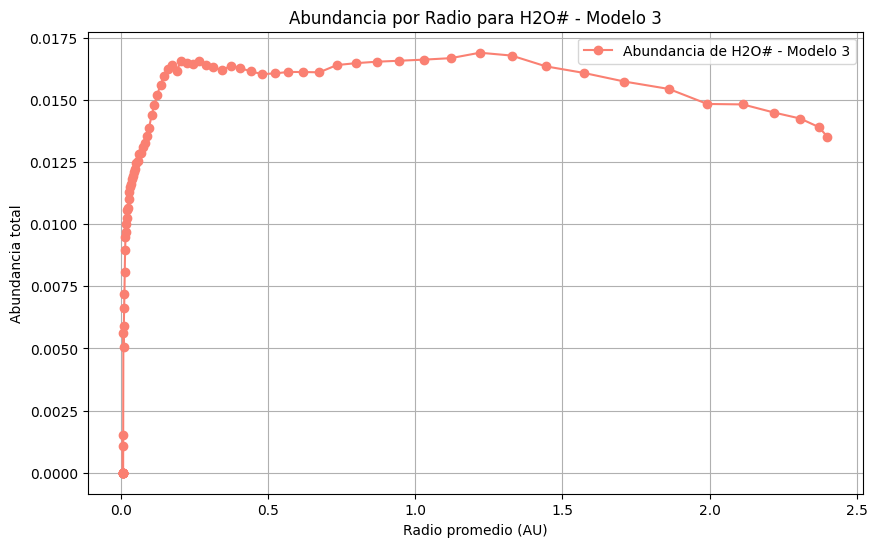

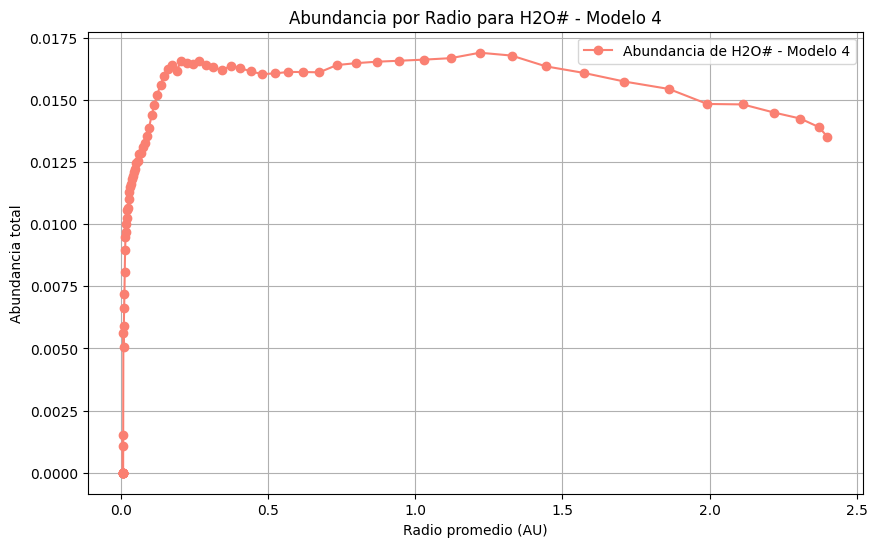

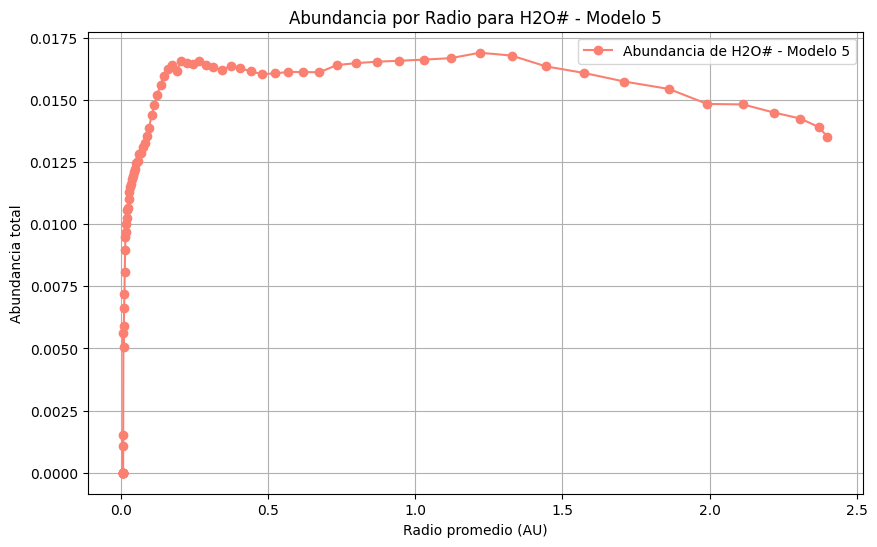

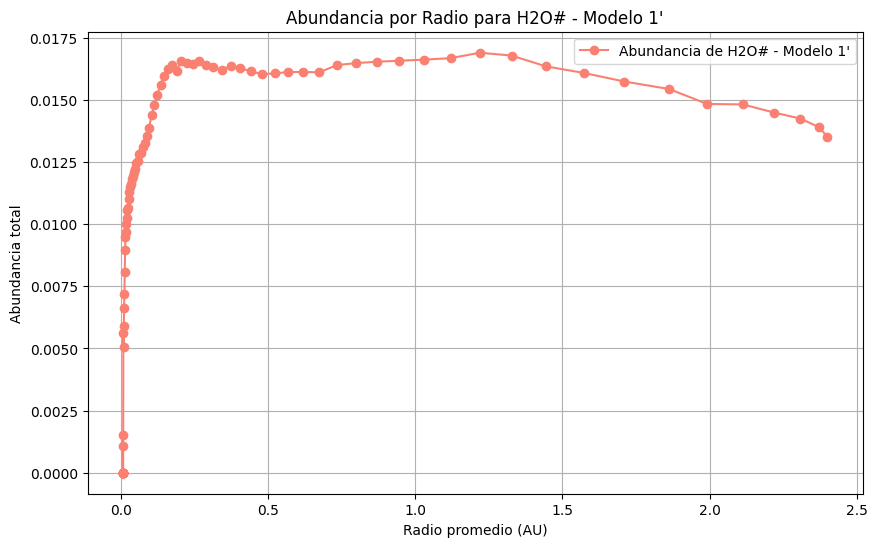

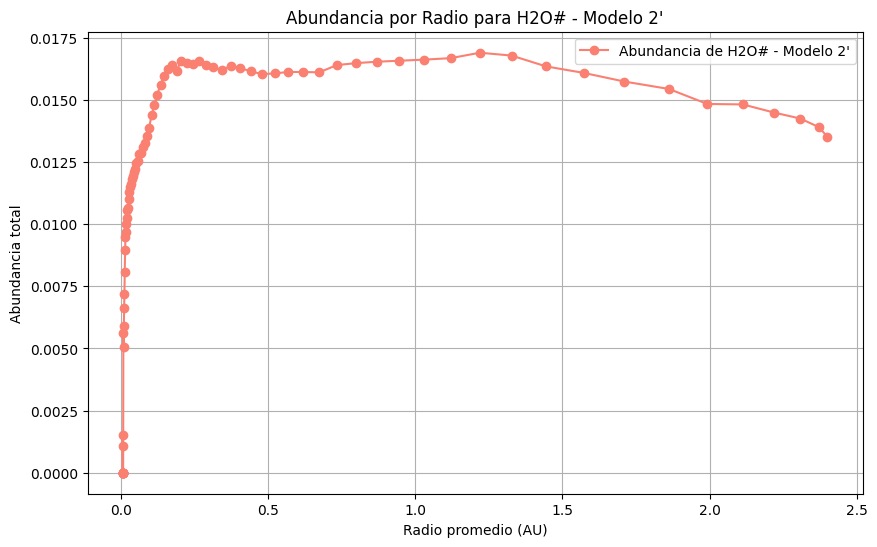

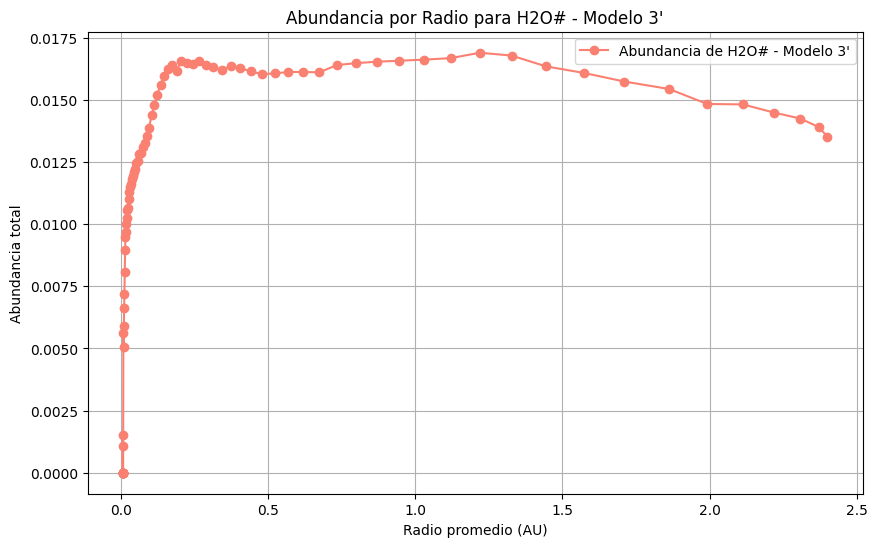

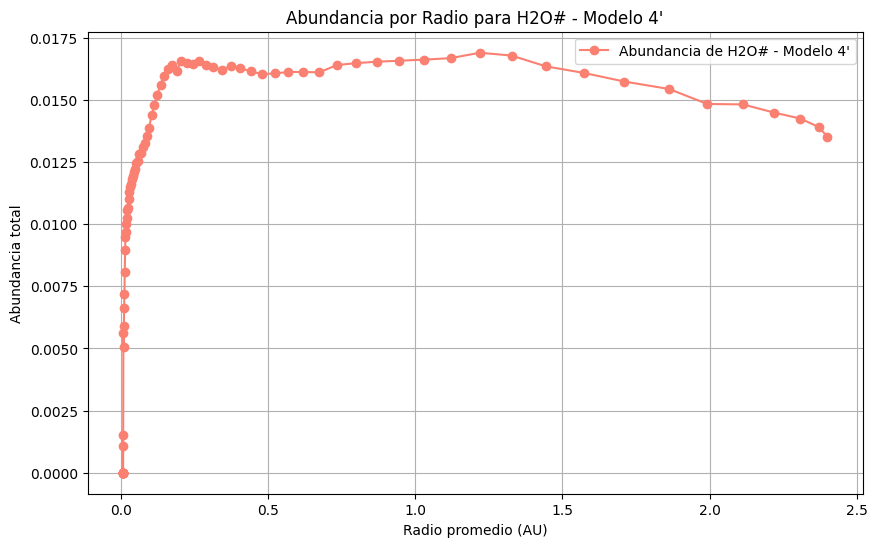

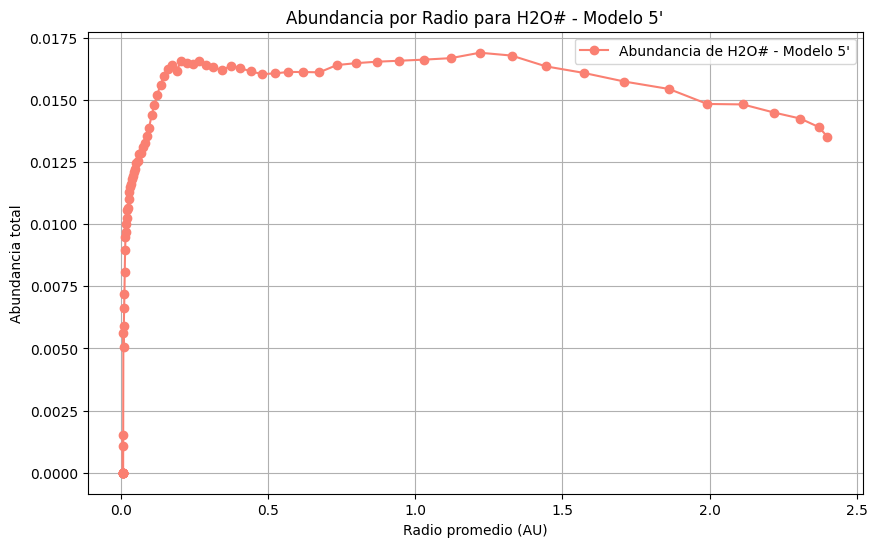

In [11]:
# Datos de las distancias orbitales en AU
alta_masa = {
    "Modelo 1": [1.422893149548029416e-02, 1.674999398325128022e-02, 2.164512653729198932e-02, 1.541877130296121501e-01, 5.809263861976293741e-01],
    "Modelo 2": [3.261463867957564711e-02, 3.918508424034180398e-02, 4.361121180417162901e-02, 6.273771682455994703e-02, 5.268795520995728232e-01],
    "Modelo 3": [1.368219440927656572e-02, 4.444850572312095821e-02, 2.589348085621707707e-01],
    "Modelo 4": [2.152631891762140509e-02, 1.661431816761621827e-01, 2.364114262461782801e-01],
    "Modelo 5": [4.806962385107056007e-02, 1.661568967470896385e-01]
}

baja_masa = {
    "Modelo 1'": [9.499892836267216298e-03, 3.432958439863272038e-02, 8.178534397755660157e-02, 2.751990317307931866e-01, 3.479523239866454398e-01],
    "Modelo 2'": [3.729283918389691421e-01],
    "Modelo 3'": [1.081811523244444358e-02, 1.320162740933040757e-01, 1.007129601312429346e+00],
    "Modelo 4'": [1.143886993552147360e-02, 1.969377074944399925e-02, 2.958288214358470794e-02, 3.718431218990225079e-02, 5.258255708136956308e-01],
    "Modelo 5'": [1.035150286090589025e-02, 1.806636664220621566e-02, 3.501700208684328797e-02, 3.192021697719940043e-01, 6.910604816644491111e-01]
}

species_name = "H2O#"
labels = list(alta_masa.keys()) + list(baja_masa.keys())

i = 0
for lab in labels:
    model_index = 0 if lab in alta_masa else 1
    abundance_data = models[i].getAbun(species_name)

    if abundance_data.shape == models[i].x.shape:
        abundance_sum = abundance_data.sum(axis=1)  # Suma a lo largo de la dimensión vertical
        x_mean = models[i].x.mean(axis=1)  # Promedio de valores radiales

        plt.figure(figsize=(10, 6))
        plt.plot(x_mean, abundance_sum, marker='o', linestyle='-', 
                 label=f"Abundancia de {species_name} - {lab}", color='salmon')
        plt.xlabel("Radio promedio (AU)")
        plt.ylabel("Abundancia total")
        plt.title(f"Abundancia por Radio para {species_name} - {lab}")
        plt.grid()
        plt.legend()
        plt.savefig(f"abun{lab}.jpg", format='jpg', dpi=300)
        plt.show()
    else:
        print(f"Dimensiones de x, z y la abundancia no coinciden para {lab}. Verifica los datos.")
i += 1

In [19]:
# ————————————————————————————————————
# 1) Definición de las distancias orbitales
# ————————————————————————————————————
alta_masa = {
    "Modelo 1": [1.4228931495480294e-02, 1.6749993983251280e-02, 2.1645126537291989e-02, 1.5418771302961215e-01, 5.8092638619762937e-01],
    "Modelo 2": [3.2614638679575647e-02, 3.9185084240341804e-02, 4.3611211804171629e-02, 6.2737716824559947e-02, 5.2687955209957282e-01],
    "Modelo 3": [1.3682194409276566e-02, 4.4448505723120958e-02, 2.5893480856217077e-01],
    "Modelo 4": [2.1526318917621405e-02, 1.6614318167616218e-01, 2.3641142624617828e-01],
    "Modelo 5": [4.8069623851070560e-02, 1.6615689674708964e-01]
}

baja_masa = {
    "Modelo 1'": [9.4998928362672163e-03, 3.4329584398632720e-02, 8.1785343977556602e-02, 2.7519903173079319e-01, 3.4795232398664544e-01],
    "Modelo 2'": [3.7292839183896914e-01],
    "Modelo 3'": [1.0818115232444444e-02, 1.3201627409330408e-01, 1.0071296013124293e+00],
    "Modelo 4'": [1.1438869935521474e-02, 1.9693770749443999e-02, 2.9582882143584708e-02, 3.7184312189902251e-02, 5.2582557081369563e-01],
    "Modelo 5'": [1.0351502860905890e-02, 1.8066366642206216e-02, 3.5017002086843288e-02, 3.1920216977199400e-01, 6.9106048166444911e-01]
}

species_name = "H2O#"
results = []

# ————————————————————————————————————
# 2) Alta masa: models[0]
# ————————————————————————————————————
abun_high    = models[0].getAbun(species_name)      # shape (nr, nz)
x_mean_high  = models[0].x.mean(axis=1)              # radio medio
abun_sum_high= abun_high.sum(axis=1)                # abundancia total por radio

for label, dist_list in alta_masa.items():
    for d in dist_list:
        val = np.interp(d, x_mean_high, abun_sum_high)
        results.append((label, "alta_masa", d, val))

# ————————————————————————————————————
# 3) Baja masa: models[1]
# ————————————————————————————————————
abun_low     = models[1].getAbun(species_name)
x_mean_low   = models[1].x.mean(axis=1)
abun_sum_low = abun_low.sum(axis=1)

for label, dist_list in baja_masa.items():
    for d in dist_list:
        val = np.interp(d, x_mean_low, abun_sum_low)
        results.append((label, "baja_masa", d, val))

# ————————————————————————————————————
# 4) Guardar en archivo de texto
# ————————————————————————————————————
output_file = "abundancias_H2O_solid_PDS70c.txt"
with open(output_file, "w") as f:
    f.write("Modelo\tTipo\tDistancia_AU\tAbundancia_total\n")
    for model, tipo, dist, abund in results:
        f.write(f"{model}\t{tipo}\t{dist:.6e}\t{abund:.6e}\n")

print(f"Abundancias guardadas en {output_file}")

Abundancias guardadas en abundancias_H2O_solid_PDS70c.txt


<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5006/3180647326.py:63: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Masa de Hielo ($M_{\oplus}$)', fontsize=14)


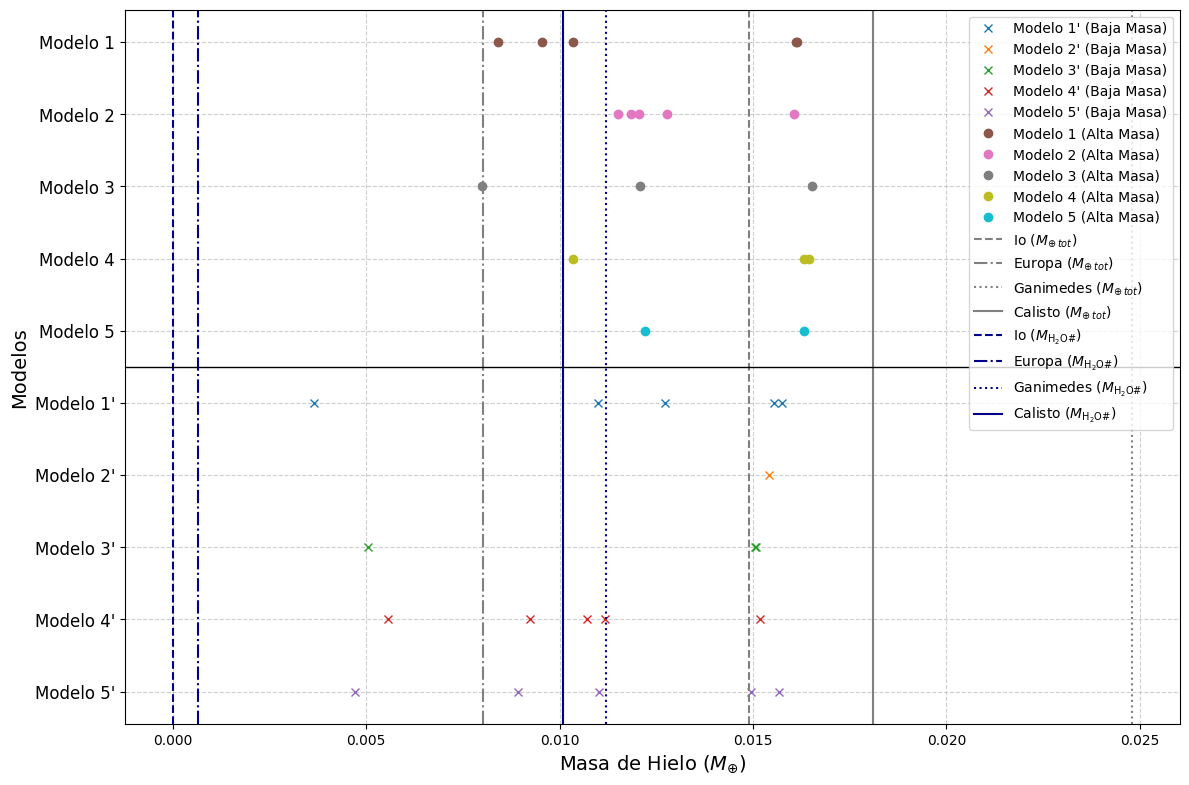

In [17]:
# ————————————————————————————————————
# Datos de las masas de hielo de agua en unidades de M⊕
# ————————————————————————————————————
masas_hielo_alta_masa = {
    "Modelo 1": [8.412069e-03, 9.541376e-03, 1.036045e-02, 1.611126e-02, 1.612697e-02],
    "Modelo 2": [1.150551e-02, 1.184531e-02, 1.204532e-02, 1.278721e-02, 1.607163e-02],
    "Modelo 3": [8.005421e-03, 1.208928e-02, 1.651532e-02],
    "Modelo 4": [1.034170e-02, 1.630971e-02, 1.644799e-02],
    "Modelo 5": [1.221050e-02, 1.630990e-02]
}

masas_hielo_baja_masa = {
    "Modelo 1'": [3.659318e-03, 1.099327e-02, 1.271484e-02, 1.576035e-02, 1.554559e-02],
    "Modelo 2'": [1.540381e-02],
    "Modelo 3'": [5.043046e-03, 1.508980e-02, 1.504870e-02],
    "Modelo 4'": [5.552068e-03, 9.235096e-03, 1.071508e-02, 1.117171e-02, 1.517411e-02],
    "Modelo 5'": [4.706281e-03, 8.937979e-03, 1.102813e-02, 1.568348e-02, 1.495046e-02]
}

# ————————————————————————————————————
# Datos de los satélites galileanos
# ————————————————————————————————————
galileanas_hielo = {"Io": 0, "Europa": 6.42e-04, "Ganimedes": 1.12e-02, "Calisto": 1.01e-02}
galileanas       = {"Io": 1.49e-02, "Europa": 8.03e-03, "Ganimedes": 2.48e-02, "Calisto": 1.81e-02}

# ————————————————————————————————————
# Invertir el orden de ambos conjuntos de modelos
# ————————————————————————————————————
alta_keys = list(masas_hielo_alta_masa.keys())[::-1]   # 5→1
baja_keys = list(masas_hielo_baja_masa.keys())[::-1]   # Ahora 5'→1'
modelos_juntos = baja_keys + alta_keys

# Mapear cada modelo a una posición y numérica
y_positions = {modelo: idx for idx, modelo in enumerate(modelos_juntos)}

plt.figure(figsize=(12, 8))

# Graficar puntos para baja masa (cruces) y alta masa (círculos)
for modelo, valores in masas_hielo_baja_masa.items():
    ys = [y_positions[modelo]] * len(valores)
    plt.plot(valores, ys, 'x', label=f"{modelo} (Baja Masa)")

for modelo, valores in masas_hielo_alta_masa.items():
    ys = [y_positions[modelo]] * len(valores)
    plt.plot(valores, ys, 'o', label=f"{modelo} (Alta Masa)")

# Líneas verticales: masa total y masa de hielo de las Galileanas
linestyles = ['--', '-.', ':', '-']
for i, (nombre, masa) in enumerate(galileanas.items()):
    plt.axvline(masa, color='gray', linestyle=linestyles[i], 
                label=rf"{nombre} ($M_{{\oplus\,tot}}$)")

for i, (nombre, masa) in enumerate(galileanas_hielo.items()):
    plt.axvline(masa, color='darkblue', linestyle=linestyles[i],
                label=rf"{nombre} ($M_{{\mathrm{{H_2O\#}}}}$)")

# Línea divisoria
plt.axhline(y=len(baja_keys)-0.5, color='black', linestyle='-', linewidth=1)

# Configuración de ejes y leyenda
plt.yticks(list(y_positions.values()), list(y_positions.keys()), fontsize=12)
plt.xscale('log')
plt.xlabel('Masa de Hielo ($M_{\oplus}$)', fontsize=14)
plt.ylabel('Modelos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10, ncol=1)
plt.tight_layout()
plt.xscale('linear')
plt.savefig("comparacion_modelos_hielo_invertido_todos.pdf")
plt.show()